# Assignment: Used Car Price prediction

In this assignment, we are providing you the Used Car New Price dataset. The New Price is referenced via different features such as Year, Location, Brand, Model etc. The task is to predict New Price using Supervised Machine Learning alogorithms that has been learned so far. Built the model, submit the jupyter notebook and we will evaluate it.

**Independent Variables**

<br>`Location` - An identifier for each City
<br>`Year` - Calendar Year
<br>`Kilometers_Driven` - Odometer reading driven in Kilometers of a model
<br>`Fuel_Type` - Fuel Types of a model
<br>`Transmission` - Transmission type of a model
<br>`Owner_Type` - Owner Type of a model
<br>`Seats` - #of Seats of a model
<br>`mileage_num` - Mileage Number of a model
<br>`engine_num` - Engine Number of a model
<br>`power_num` - Power Number of a model
<br>`Brand` - Brand of a model
<br>`Model` - Model of a model
<br>`Price` - Price of a model

**Target Varible**

`New_Price` -  Predict New Price of a model

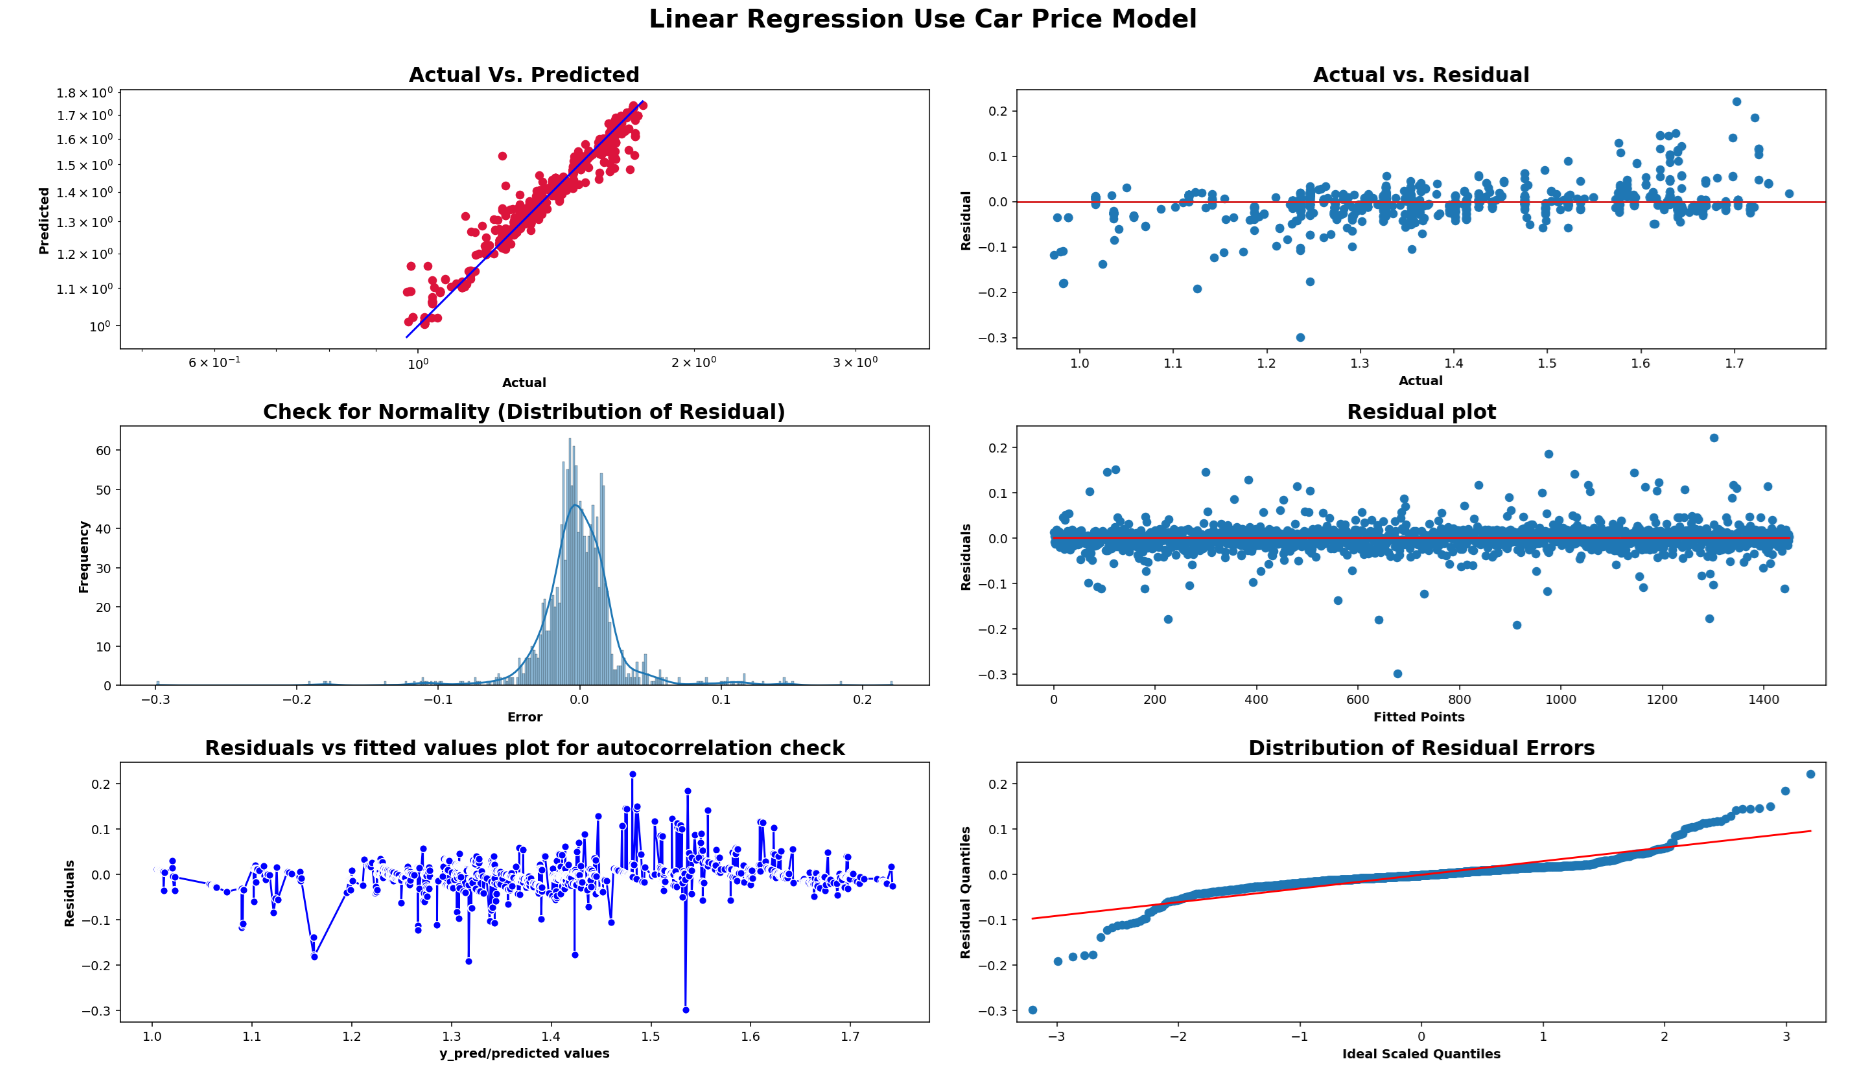

## Outline to model and predict 'Used Car New Price'
    
1. [Import Libraries](#1)
2. [Variable Identification and Typecasting](#2)
3. [Exploratory Data Analysis (EDA)](#3)
    <br>[3.1 Univariate Analysis: Numerical Variables](#3.1)
    <br>[3.2 Univariate Analysis: Outliers](#3.2)
    <br>[3.3 Univariate Analysis: Categorical Varibales](#3.3)
    <br>[3.4 Univariate Analysis: Missing Values](#3.4)
    <br>[3.5 Bivariate Analysis : Numerical-Numerical](#3.5)
    <br>[3.6 Bivariate Analysis : Continuous - Categorical](#3.6)
        <br>- [3.6.1 Perform Anova Tests](#3.6.1)
        <br>- [3.6.2 Perform Two-Way Anova Tests](#3.6.2)
    <br>[3.7 Bivariate Analysis : Categorical - Categorical](#3.7)
    <br>[3.8 Multivariate Analysis](#3.8)
4. [Feature Engineering](#4)
    <br>[4.1 Feature Generation - Binning](#4.1)
    <br>[4.1 Handle Missing Values](#4.2)
    <br>[4.2 Identify and Remove Outlier](#4.3)
    <br>[4.4 Encoding (Label Encoding, One-Hot Encoding, Target Encoding)](#4.4)
5. [Model Building](#5)
    <br>[5.1 Simple Mean (Mean of 'New_Price')](#5.1)
    <br>[5.2 Build Linear Regression Model (Sklear Linear Model)](#5.2)
    <br>[5.3 Build Assumptions for Linear Regression](#5.3)
    <br>[5.4 Build Linear Regression Model (statsmodels OLS Model)](#5.4)


7. `Hyperparameter Tuning Using Grid Search Cross-Validation`


## 1. Import Libraries<a id='1'></a>

In [1]:
# Import necessary Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler, \
OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as MSE, r2_score

from category_encoders import BinaryEncoder, MEstimateEncoder

from scipy.stats import f_oneway
from scipy.stats import boxcox

import category_encoders as ce
# import mlmachine as mlm

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print('Libraries imported')

Libraries imported


In [5]:
# Read used car data file and import as Pandas Dataframe

used_cars_df = pd.read_excel('Datasets/used_cars_data.xlsx')
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage_num,engine_num,power_num,Brand,Model,New_Price,Price,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,26.60,998.0,58.16,maruti,wagon,5.51,1.75,NaN,3.91,NaN
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,19.67,1582.0,126.20,hyundai,creta,16.06,12.50,NaN,NaN,11.0
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,18.20,1199.0,88.70,honda,jazz,8.61,4.50,NaN,NaN,27.0
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,20.77,1248.0,88.76,maruti,ertiga,11.27,6.00,NaN,3.75,40.0
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,audi,a4,53.14,17.74,NaN,NaN,61.0


## 2. Variable Identification and Typecasting<a id='2'></a>

In [6]:
# Check out Rows (Observations) and Columns (Features / Variables) of the dataset

used_cars_df.shape

(7252, 17)

In [7]:
# Review basic information of each column: datatypes, #of rows, null etc.

used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7252 non-null   object 
 1   Year               7252 non-null   int64  
 2   Kilometers_Driven  7251 non-null   float64
 3   Fuel_Type          7252 non-null   object 
 4   Transmission       7252 non-null   object 
 5   Owner_Type         7252 non-null   object 
 6   Seats              7199 non-null   float64
 7   mileage_num        7169 non-null   float64
 8   engine_num         7206 non-null   float64
 9   power_num          7077 non-null   float64
 10  Brand              7252 non-null   object 
 11  Model              7252 non-null   object 
 12  New_Price          7252 non-null   float64
 13  Price              6019 non-null   float64
 14  Unnamed: 14        0 non-null      float64
 15  Unnamed: 15        2 non-null      float64
 16  Unnamed: 16        7 non

In [8]:
# Typecasting of variables into 'Category' for having categorical values

used_cars_df['Location']     = used_cars_df['Location'].astype('category')
used_cars_df['Year']     = used_cars_df['Year'].astype('category')
used_cars_df['Fuel_Type']    = used_cars_df['Fuel_Type'].astype('category')  
used_cars_df['Transmission'] = used_cars_df['Transmission'].astype('category') 
used_cars_df['Owner_Type']   = used_cars_df['Owner_Type'].astype('category') 
used_cars_df['Brand']        = used_cars_df['Brand'].astype('category') 
used_cars_df['Model']        = used_cars_df['Model'].astype('category')
used_cars_df['Seats']        = used_cars_df['Seats'].astype('category')

In [9]:
# Check datatypes of the variables after converting datatypes

used_cars_df.dtypes

Location             category
Year                 category
Kilometers_Driven     float64
Fuel_Type            category
Transmission         category
Owner_Type           category
Seats                category
mileage_num           float64
engine_num            float64
power_num             float64
Brand                category
Model                category
New_Price             float64
Price                 float64
Unnamed: 14           float64
Unnamed: 15           float64
Unnamed: 16           float64
dtype: object

In [10]:
# Create logical groups of variables : Numerical and categorical

# Numerical groups
num_features        = ['Kilometers_Driven', 'mileage_num', 'engine_num', 'power_num', 'New_Price','Price']
dist_features       = ['Kilometers_Driven', 'mileage_num']
engine_features     = ['engine_num', 'power_num']
price_features      = ['New_Price', 'Price']

# Categorical Groups
cat_features        = ['Location', 'Year', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 
                       'Model', 'NP_Category']
fuel_trans_type     = ['Fuel_Type', 'Transmission']
owner_seat_types    = ['Owner_Type', 'Seats']
brand_model_types   = [ 'Year', 'Brand', 'Model', 'NP_Category']

target              = ['New_Price']

### 3. Exploratory Data Analysis (EDA)

[Exploratory Data Analysis (EDA)](./eda_used_car_price-annova.ipynb).

## 4. Feature Engineering<a id='4'></a>

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. Feature engineering efforts mainly have two goals:

Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

Improving the performance of machine learning models.

The important point is that machine learning algorithms desire structured dataset because of that reason feature engineering is a key indicator for data science life cyle. Harward Business Review article stated that, "Poor data quality is enemy number one to the widespread, profitable use of machine learning. The quality demands of machine learning are steep, and bad data can rear its ugly head twice both in the historical data used to train the predictive model and in the new data used by that model to make future decisions. To ensure you have the right data for machine learning, you must have an aggressive, well-executed quality program."

Besides that, according to a survey in Forbes, data scientists spend 80% of their time on data preparation.

Some feature engineering topics can be listed as below.

- Feature Generation - Binning
- Missing Values
- Outliers
- Encoding (One-Hot Encoding, Binary Encoding, Label Encoding)
- Feature Scaling
- Feature Extraction
- Feature Interactions
- End-to-End Application

### 4.1 Feature Generation - Binning<a id='4.1'></a>

In [11]:
bins  = [1, 7, 11, 27, 40, 61, 75, 100, 140, 170, 400]
group = ['Upto_7','7-11','11-27','27-40', '40-61', '61-75', '75-100','100-140', '140-170','170-400']
used_cars_df['NP_Category'] = pd.cut(used_cars_df['New_Price'], bins, labels = group)
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage_num,engine_num,power_num,Brand,Model,New_Price,Price,Unnamed: 14,Unnamed: 15,Unnamed: 16,NP_Category
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,26.60,998.0,58.16,maruti,wagon,5.51,1.75,NaN,3.91,NaN,Upto_7
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,19.67,1582.0,126.20,hyundai,creta,16.06,12.50,NaN,NaN,11.0,11-27
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,18.20,1199.0,88.70,honda,jazz,8.61,4.50,NaN,NaN,27.0,7-11
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,20.77,1248.0,88.76,maruti,ertiga,11.27,6.00,NaN,3.75,40.0,11-27
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,audi,a4,53.14,17.74,NaN,NaN,61.0,40-61


### 4.2 Handle Missing Values<a id='4.2'></a>

The imputation method develops reasonable guesses for missing data. It’s most useful when the percentage of missing data is low. If the portion of missing data is too high, the results lack natural variation that could result in an effective model.

In [12]:
used_cars_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
New_Price               0
Price                1233
Unnamed: 14          7252
Unnamed: 15          7250
Unnamed: 16          7245
NP_Category             0
dtype: int64

<Axes: >

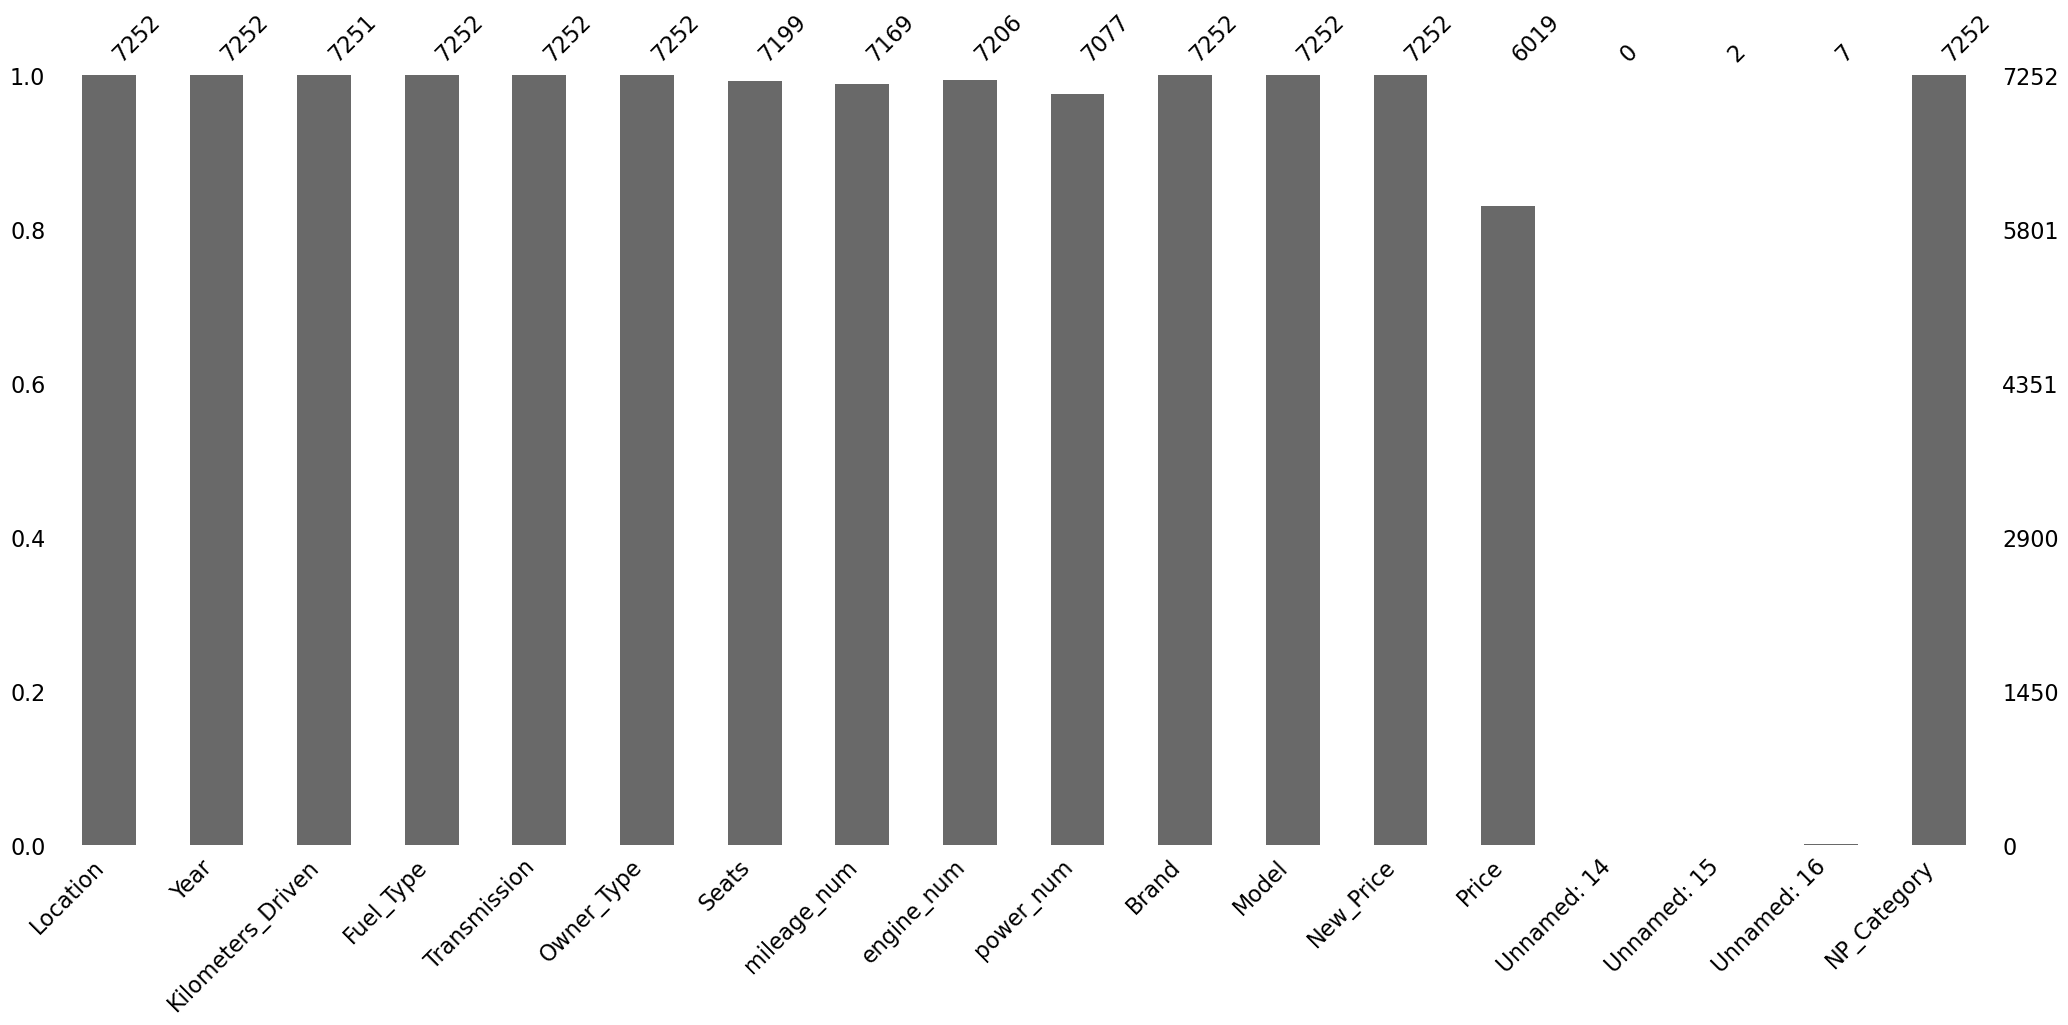

In [13]:
msno.bar(used_cars_df)

In [14]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7252 non-null   category
 1   Year               7252 non-null   category
 2   Kilometers_Driven  7251 non-null   float64 
 3   Fuel_Type          7252 non-null   category
 4   Transmission       7252 non-null   category
 5   Owner_Type         7252 non-null   category
 6   Seats              7199 non-null   category
 7   mileage_num        7169 non-null   float64 
 8   engine_num         7206 non-null   float64 
 9   power_num          7077 non-null   float64 
 10  Brand              7252 non-null   category
 11  Model              7252 non-null   category
 12  New_Price          7252 non-null   float64 
 13  Price              6019 non-null   float64 
 14  Unnamed: 14        0 non-null      float64 
 15  Unnamed: 15        2 non-null      float64 
 16  Unname

In [15]:
used_cars_df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       1
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
mileage_num            83
engine_num             46
power_num             175
Brand                   0
Model                   0
New_Price               0
Price                1233
Unnamed: 14          7252
Unnamed: 15          7250
Unnamed: 16          7245
NP_Category             0
dtype: int64

 **Mean / Median per Group**
 
 Replacement value = variable mean or median based on some grouping.

Suitable numerical variables.
Grouping variable should be categorical or discrete.
Why :
We’d like a better representation of the missing data. The variable distribution differs based on the grouping variable.

There are some approach to resolve missing data as below:

- Dropping the missing data points
- Assigning mean, median value of the related column of the dataset
- Using imputer to fill the missing data points
- Value Assignment in Categorical Variable Breakdown
- Using predictive methods to fill missing data points

In [16]:
# list of numeric column that has missing values for X_train

numeric_missing = [col for col in num_features if used_cars_df[col].isnull().sum() > 0] 

# percentage of missing values for numeric variable

(used_cars_df[numeric_missing].isnull().sum()/used_cars_df.shape[0]).sort_values(ascending=False)

Price                0.170022
power_num            0.024131
mileage_num          0.011445
engine_num           0.006343
Kilometers_Driven    0.000138
dtype: float64

In [17]:
numeric_missing

['Kilometers_Driven', 'mileage_num', 'engine_num', 'power_num', 'Price']

**Check out Median 'numeric_missing' values for 'NaN' against categorical group**

In [18]:
# Create 'Brand group' having median 'New_Price' for NaN numerica features 

used_cars_df.groupby(['Brand'])[numeric_missing].median()

,Kilometers_Driven,mileage_num,engine_num,power_num,Price
Brand,,,,,
ambassador,80000.0,12.800,1489.0,35.500,1.350
audi,52830.0,15.730,1968.0,174.330,23.500
bentley,39600.0,9.400,5998.0,584.000,59.000
bmw,54385.0,17.050,1995.0,190.000,21.000
chevrolet,62242.0,18.100,1199.0,79.400,2.500
datsun,20487.0,20.630,1198.0,67.000,3.100
fiat,54705.0,19.000,1248.0,90.600,2.600
force,41000.0,17.000,2200.0,139.010,8.000
ford,60924.0,18.880,1498.0,89.840,5.345


In [19]:
# Create 'Model group' having median 'New_Price' for NaN numerica features 

used_cars_df.groupby(['Model'])[numeric_missing].median()

,Kilometers_Driven,mileage_num,engine_num,power_num,Price
Model,,,,,
1,46001.0,20.580,1995.0,143.00,17.000
3,55598.0,18.880,1995.0,184.00,15.900
5,58699.0,18.120,1995.0,190.00,22.100
6,30000.0,9.520,2993.0,313.00,45.000
7,51000.0,16.460,2993.0,258.00,34.540
...,...,...,...,...,...
xylo,92381.0,14.000,2498.0,112.00,4.500
yeti,90500.0,17.695,1968.0,123.29,7.245
z4,17476.0,10.370,2979.0,306.00,44.270


In [20]:
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage_num,engine_num,power_num,Brand,Model,New_Price,Price,Unnamed: 14,Unnamed: 15,Unnamed: 16,NP_Category
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,26.60,998.0,58.16,maruti,wagon,5.51,1.75,NaN,3.91,NaN,Upto_7
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,19.67,1582.0,126.20,hyundai,creta,16.06,12.50,NaN,NaN,11.0,11-27
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,18.20,1199.0,88.70,honda,jazz,8.61,4.50,NaN,NaN,27.0,7-11
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,20.77,1248.0,88.76,maruti,ertiga,11.27,6.00,NaN,3.75,40.0,11-27
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,audi,a4,53.14,17.74,NaN,NaN,61.0,40-61


In [21]:
# Add below 'NA columns' to keep track for missing values from the respective columns

used_cars_df['Seats_NA']             = used_cars_df['Seats'].isnull()*1
used_cars_df['mileage_num_NA']       = used_cars_df['mileage_num'].isnull()*1
used_cars_df['engine_num_NA']        = used_cars_df['engine_num'].isnull()*1
used_cars_df['power_num_NA']         = used_cars_df['power_num'].isnull()*1
used_cars_df['Kilometers_Driven_NA'] = used_cars_df['Kilometers_Driven'].isnull()*1

In [22]:
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage_num,engine_num,power_num,...,Price,Unnamed: 14,Unnamed: 15,Unnamed: 16,NP_Category,Seats_NA,mileage_num_NA,engine_num_NA,power_num_NA,Kilometers_Driven_NA
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,26.60,998.0,58.16,...,1.75,NaN,3.91,NaN,Upto_7,0,0,0,0,0
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,19.67,1582.0,126.20,...,12.50,NaN,NaN,11.0,11-27,0,0,0,0,0
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,18.20,1199.0,88.70,...,4.50,NaN,NaN,27.0,7-11,0,0,0,0,0
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,20.77,1248.0,88.76,...,6.00,NaN,3.75,40.0,11-27,0,0,0,0,0
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,...,17.74,NaN,NaN,61.0,40-61,0,0,0,0,0


In [23]:
# Impute median 'mileage_num' by 'Model' for 'NaN - mileage_num' 

used_cars_df['mileage_num'] = used_cars_df.groupby(['Model'])['mileage_num'].transform(lambda x: x.fillna(x.median()))
used_cars_df['mileage_num'] = used_cars_df['mileage_num'].round(2)

In [24]:
# Impute median 'engine_num' by 'Model' for 'NaN - engine_num' 

used_cars_df['engine_num'] = used_cars_df.groupby(['Model'])['engine_num'].transform(lambda x: x.fillna(x.median()))
used_cars_df['engine_num'] = used_cars_df['engine_num'].round(2)

In [25]:
# Impute median 'power_num' by 'Model' for 'NaN - power_num' 

used_cars_df['power_num'] = used_cars_df.groupby(['Model'])['power_num'].transform(lambda x: x.fillna(x.median()))
used_cars_df['power_num'] = used_cars_df['power_num'].round(2)


In [26]:
# Impute median 'Kilometers_Driven' by 'Model' for 'NaN - Kilometers_Driven' 

used_cars_df['Kilometers_Driven'] = used_cars_df.groupby(['Model'])['Kilometers_Driven'].transform(
    lambda x: x.fillna(x.median()))
used_cars_df['Kilometers_Driven'] = used_cars_df['Kilometers_Driven'].round(2)

In [27]:
# Impute 'most frequent - Seats' by 'Model' for 'NaN - Seats' 

most_frequent_seats   = used_cars_df['Seats'].mode()[0]
used_cars_df['Seats'] = used_cars_df['Seats'].fillna(most_frequent_seats)

In [28]:
used_cars_df.isnull().sum()

Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Seats                      0
mileage_num                9
engine_num                 0
power_num                 12
Brand                      0
Model                      0
New_Price                  0
Price                   1233
Unnamed: 14             7252
Unnamed: 15             7250
Unnamed: 16             7245
NP_Category                0
Seats_NA                   0
mileage_num_NA             0
engine_num_NA              0
power_num_NA               0
Kilometers_Driven_NA       0
dtype: int64

In [29]:
# Impute the missing 'mileage_num' and 'power_num' with median value of the column using 'fillna'

mileage_median = used_cars_df['mileage_num'].median()
used_cars_df['mileage_num'] = used_cars_df['mileage_num'].fillna(mileage_median)

mileage_median = used_cars_df['power_num'].median()
used_cars_df['power_num'] = used_cars_df['power_num'].fillna(mileage_median)

In [30]:
used_cars_df.isnull().sum()

Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Seats                      0
mileage_num                0
engine_num                 0
power_num                  0
Brand                      0
Model                      0
New_Price                  0
Price                   1233
Unnamed: 14             7252
Unnamed: 15             7250
Unnamed: 16             7245
NP_Category                0
Seats_NA                   0
mileage_num_NA             0
engine_num_NA              0
power_num_NA               0
Kilometers_Driven_NA       0
dtype: int64

### 4.3 Identify and Remove Outlier<a id='4.3'></a>

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

👉 Trimming: It excludes the outlier values from our analysis. By applying this technique our data becomes thin when there are more outliers present in the dataset. Its main advantage is its fastest nature.

👉 Capping: In this technique, we cap our outliers data and make the limit i.e, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

For Example, if you’re working on the income feature, you might find that people above a certain income level behave in the same way as those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

👉 Treat outliers as a missing value: By assuming outliers as the missing observations, treat them accordingly i.e, same as those of missing values.

👉 Discretization: In this technique, by making the groups we include the outliers in a particular group and force them to behave in the same manner as those of other points in that group. This technique is also known as Binning.

How to Detect Outliers ?

👉 For Normal distributions: Use empirical relations of Normal distribution.

   The data points which fall below mean-3*(sigma) or above mean+3*(sigma) are outliers.

where mean and sigma are the average value and standard deviation of a particular column.

👉 For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule (Box Plot).

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers. where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

Ref: https://www.kaggle.com/code/seneralkan/advanced-feature-engineering

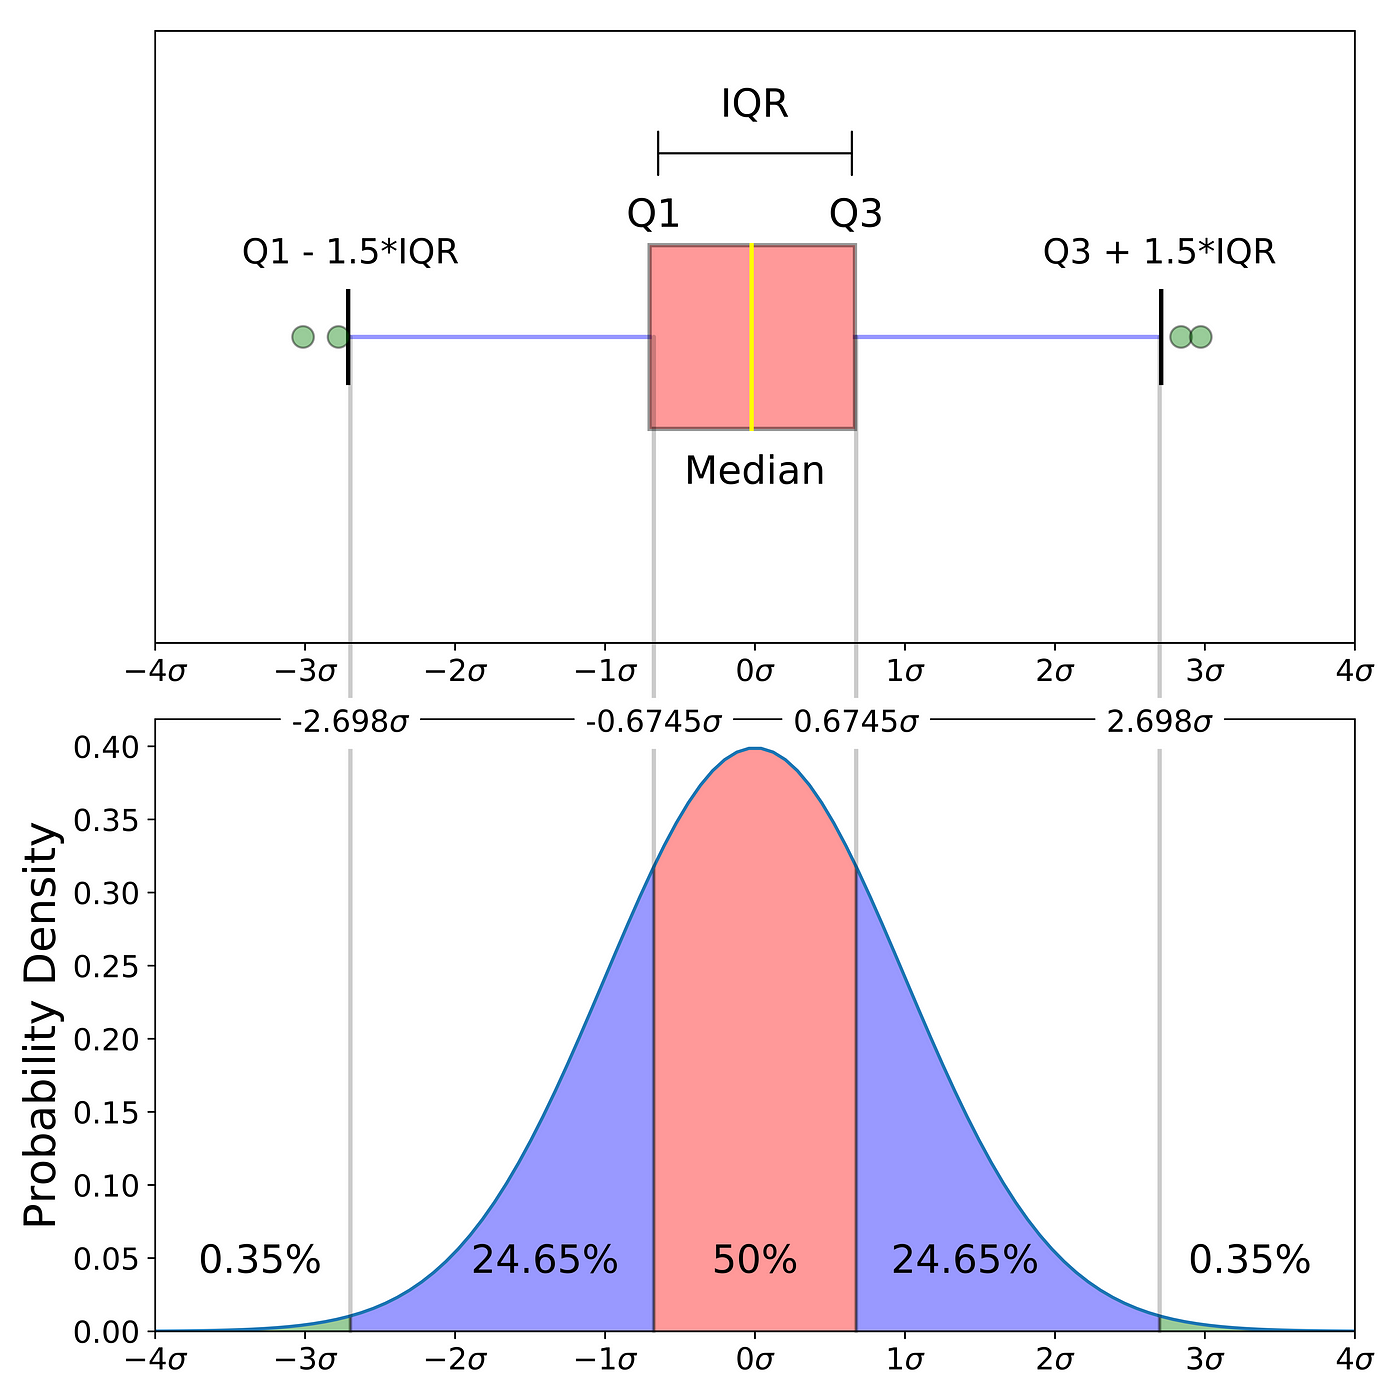

In [31]:
# Defining Interquartile Range

def fn_find_up_low_values(data, col):
    
    q1  = data[col].quantile(0.25)
    q3  = data[col].quantile(0.75)
    iqr = q3 - q1
    up  = q3 + 1.5 * iqr
    low = q1 - 1.5 * iqr
    
    return low, up

In [32]:
# Lets find which feature has any outliers ?

def fn_find_outlier(data, col, up, low):
    outlier = data[(data[col] > up) | (data[col] < low)].any(axis='columns')
    
    return outlier

In [33]:
# Lets add functionalty

def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    
    return low_limit, up_limit

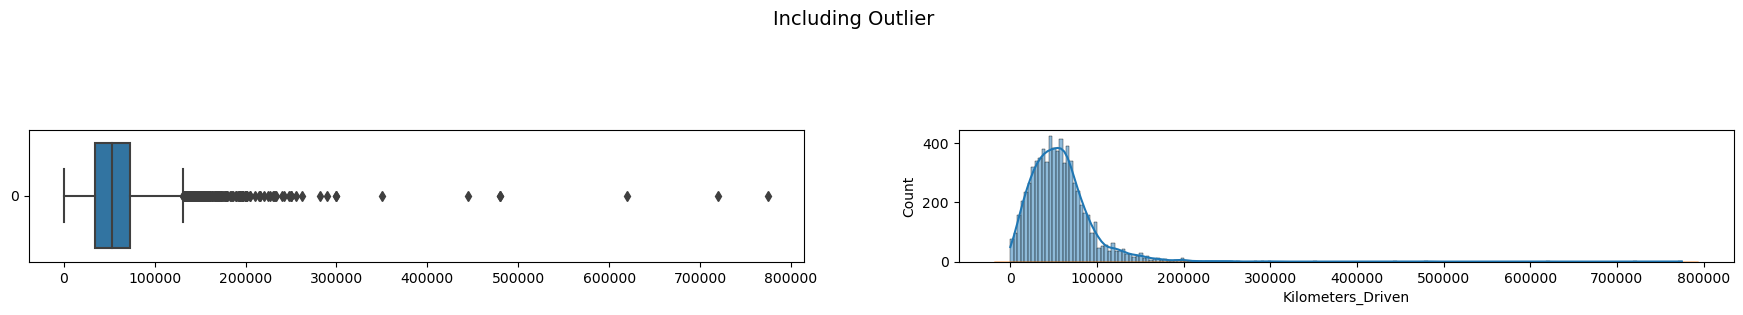

Kilometers_Driven --> Min:  171.0  Max:  775000.0 Mean:  57812.23 Median:  53429.0 Std Dev:  37499.51
Kilometers_Driven --> low limit(Q1):  -24500.0  high limit(Q3):  131500.0  IQR :  156000.0
Kilometers_Driven --> Skewness:  3.83
Kilometers_Driven --> has outliers


<Figure size 640x480 with 0 Axes>

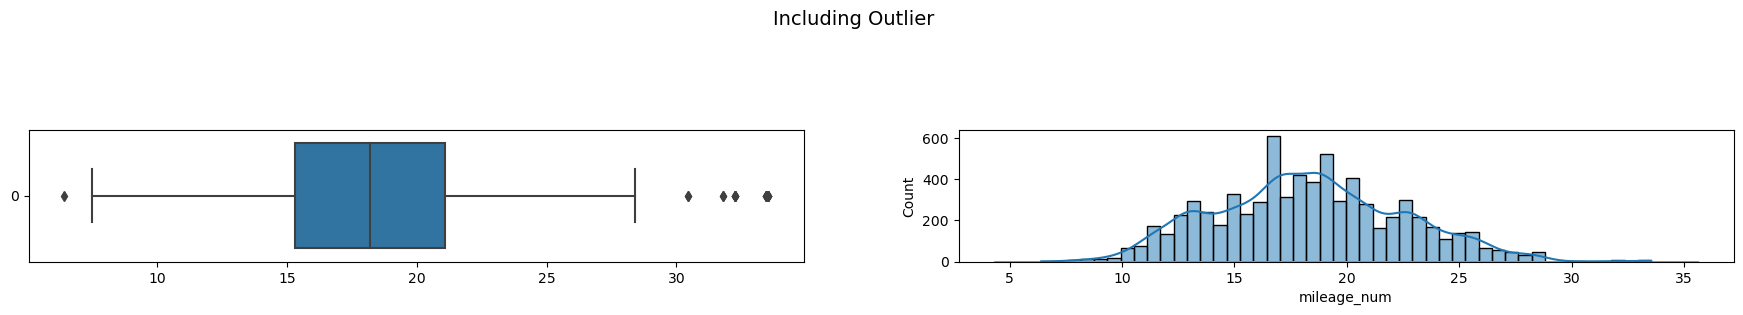

mileage_num --> Min:  6.4  Max:  33.54 Mean:  18.32 Median:  18.19 Std Dev:  4.15
mileage_num --> low limit(Q1):  6.6  high limit(Q3):  29.8  IQR :  23.2
mileage_num --> Skewness:  0.22
mileage_num --> has outliers


<Figure size 640x480 with 0 Axes>

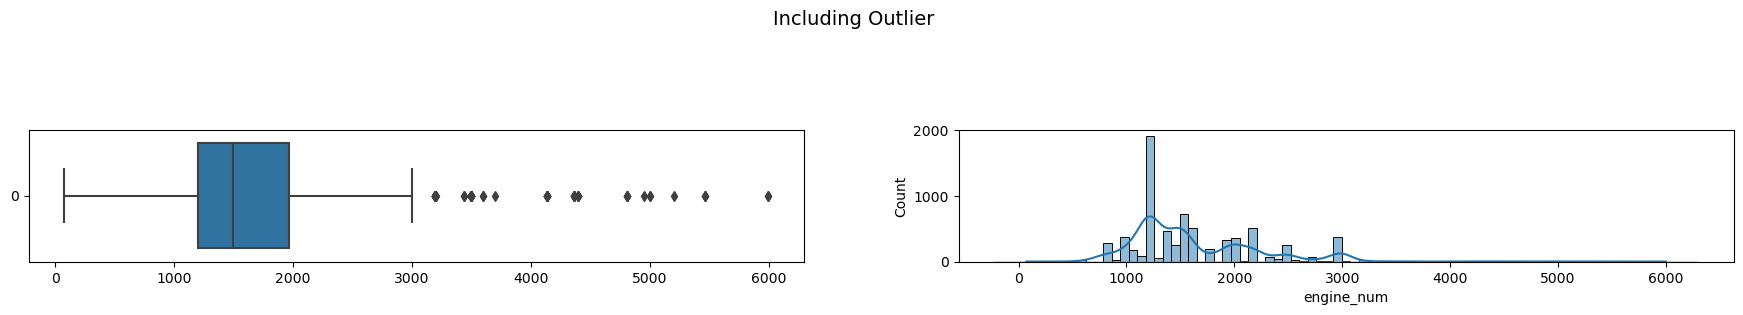

engine_num --> Min:  72.0  Max:  5998.0 Mean:  1615.57 Median:  1493.0 Std Dev:  594.36
engine_num --> low limit(Q1):  43.0  high limit(Q3):  3123.0  IQR :  3080.0
engine_num --> Skewness:  1.41
engine_num --> has outliers


<Figure size 640x480 with 0 Axes>

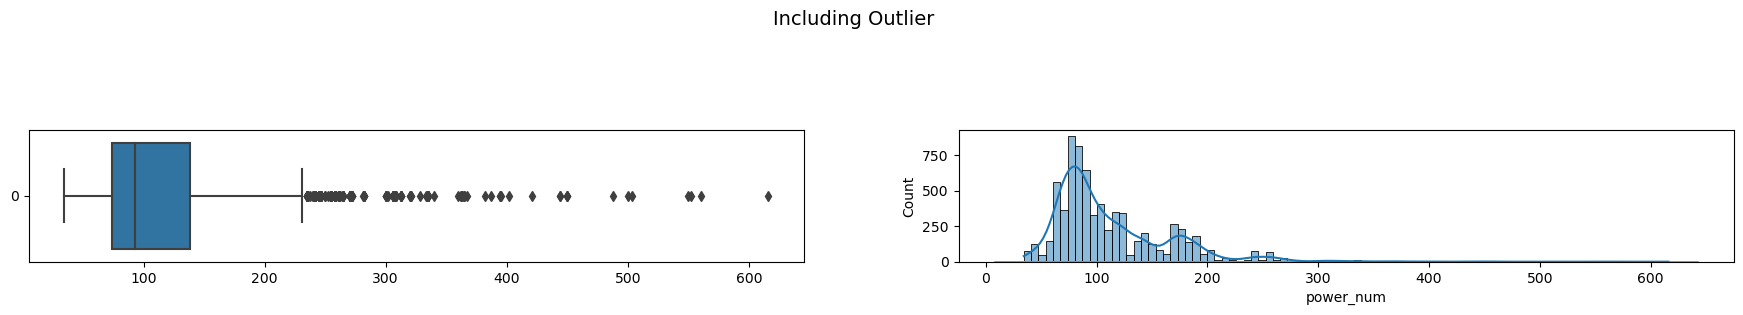

power_num --> Min:  34.2  Max:  616.0 Mean:  112.13 Median:  92.7 Std Dev:  53.31
power_num --> low limit(Q1):  -22.04  high limit(Q3):  234.08  IQR :  256.12
power_num --> Skewness:  1.97
power_num --> has outliers


<Figure size 640x480 with 0 Axes>

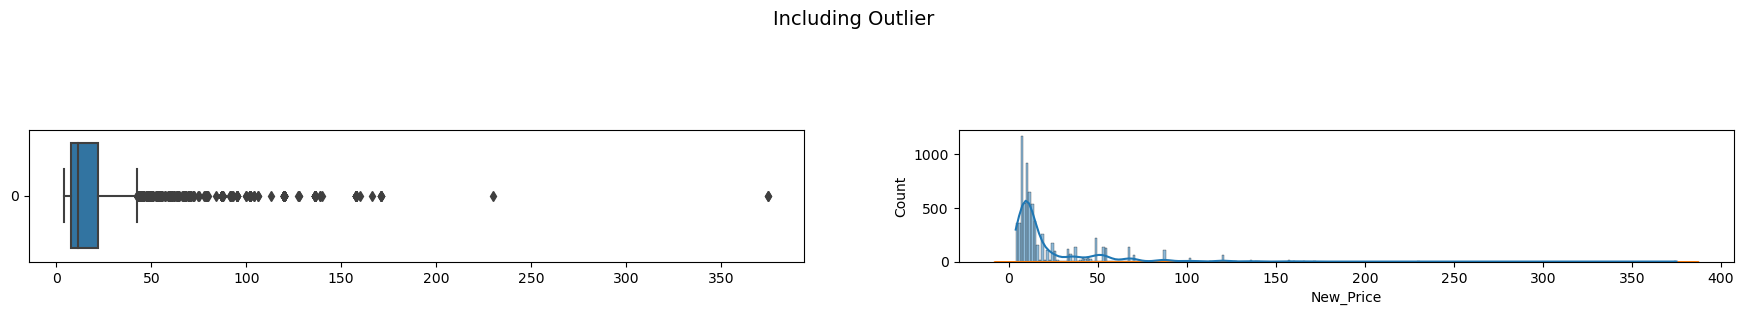

New_Price --> Min:  3.91  Max:  375.0 Mean:  21.31 Median:  11.3 Std Dev:  24.26
New_Price --> low limit(Q1):  -12.85  high limit(Q3):  42.42  IQR :  55.27
New_Price --> Skewness:  3.29
New_Price --> has outliers


<Figure size 640x480 with 0 Axes>

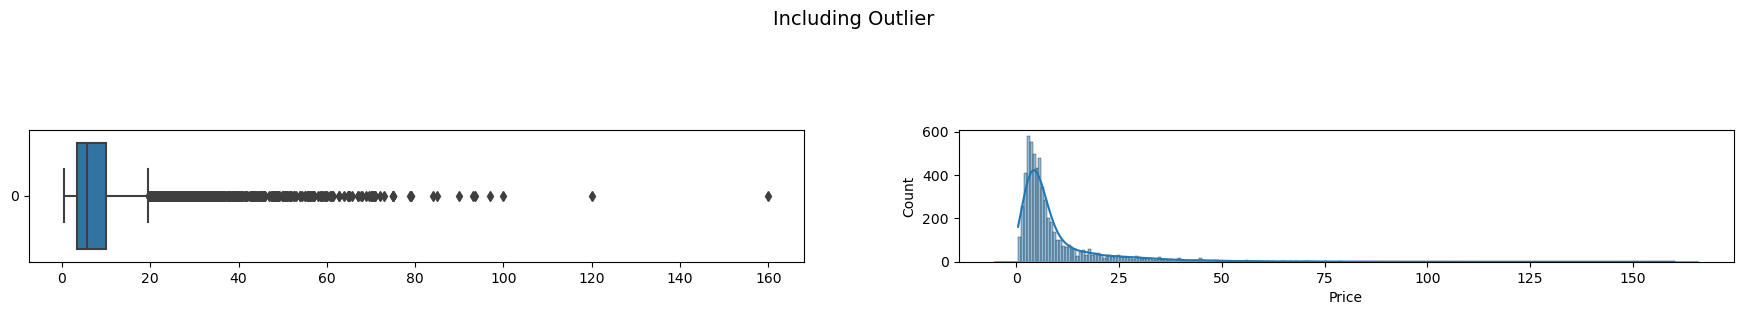

Price --> Min:  0.44  Max:  160.0 Mean:  9.48 Median:  5.64 Std Dev:  11.19
Price --> low limit(Q1):  -6.17  high limit(Q3):  19.62  IQR :  25.8
Price --> Skewness:  3.34
Price --> has outliers


<Figure size 640x480 with 0 Axes>

In [34]:
# Identify Outliers from the numberical columns and plot displaying with other statistical values

index = 0
j = 0
for col in num_features:
    
    index += 1
    j += 1
    
    fig = plt.figure(figsize = (22,12))
    
    plt.suptitle('Including Outlier', fontsize = 14)
    ax = plt.subplot(len(num_features),2, j)
    sns.boxplot(used_cars_df[col], orient='h', ax = ax)
    
    ax1 = plt.subplot(len(num_features),2, j+1)
    sns.histplot(used_cars_df[col], fill = True, kde = True, legend = True, ax = ax1)
    sns.kdeplot(used_cars_df[col], fill = True, legend = True, ax = ax1)
    
    plt.show()
    
    print(col, '--> Min: ',np.round(used_cars_df[col].min(),2),' Max: ', np.round(used_cars_df[col].max(),2), 'Mean: ', 
          np.round(used_cars_df[col].mean(),2), 'Median: ', np.round(used_cars_df[col].median(),2), 
          'Std Dev: ', np.round(used_cars_df[col].std(),2))
    
    low, high = outlier_thresholds(used_cars_df, col)
    print(col, '--> low limit(Q1): ',np.round(low,2),' high limit(Q3): ',np.round(high,2),
         ' IQR : ', np.round((high - low),2))
    print(col, '--> Skewness: ',np.round(used_cars_df[col].skew(),2))
    is_outlier = fn_find_outlier(used_cars_df, col, low, high)
    if is_outlier.any() == True:
         print(col,"--> has outliers")
    else:
         print(col, '--> has no outliers')
    
    j = 0

    plt.tight_layout()

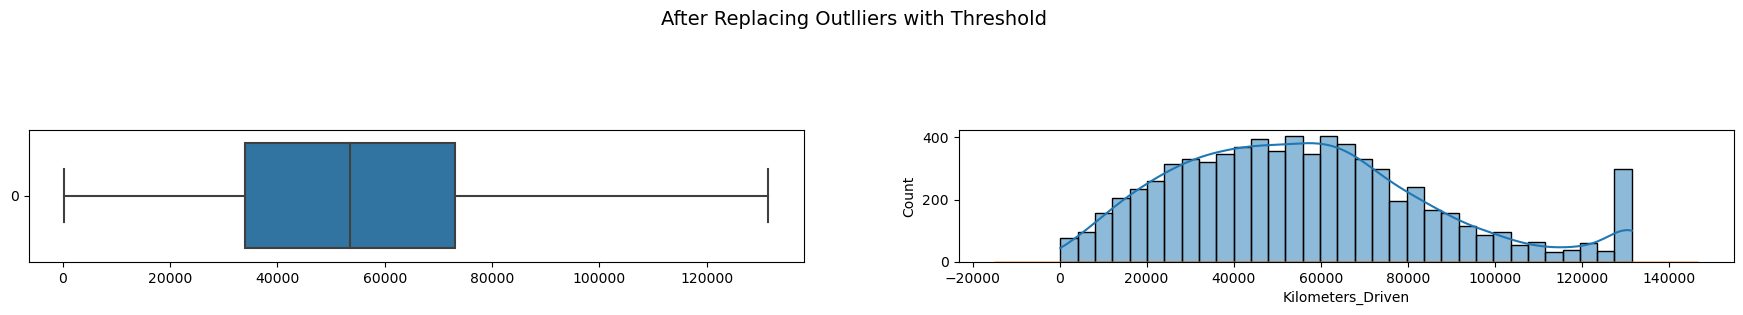

Kilometers_Driven --> Min:  171.0  Max:  131500.0 Mean:  56268.37 Median:  53429.0 Std Dev:  30176.42
Kilometers_Driven --> low limit(Q1):  -24500.0  high limit(Q3):  131500.0  IQR :  156000.0
Kilometers_Driven --> Skewness:  0.62


<Figure size 640x480 with 0 Axes>

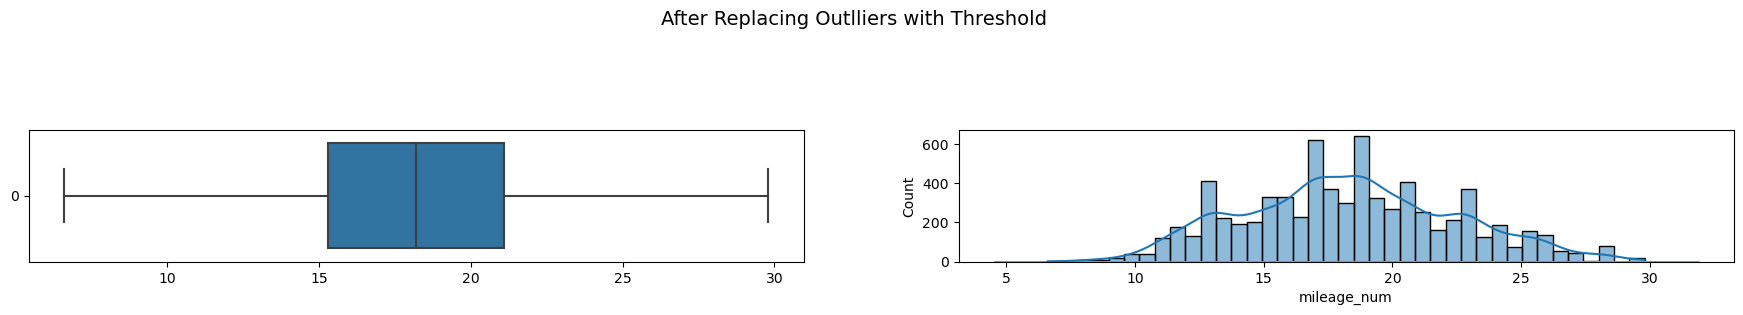

mileage_num --> Min:  6.6  Max:  29.8 Mean:  18.31 Median:  18.19 Std Dev:  4.12
mileage_num --> low limit(Q1):  6.6  high limit(Q3):  29.8  IQR :  23.2
mileage_num --> Skewness:  0.17


<Figure size 640x480 with 0 Axes>

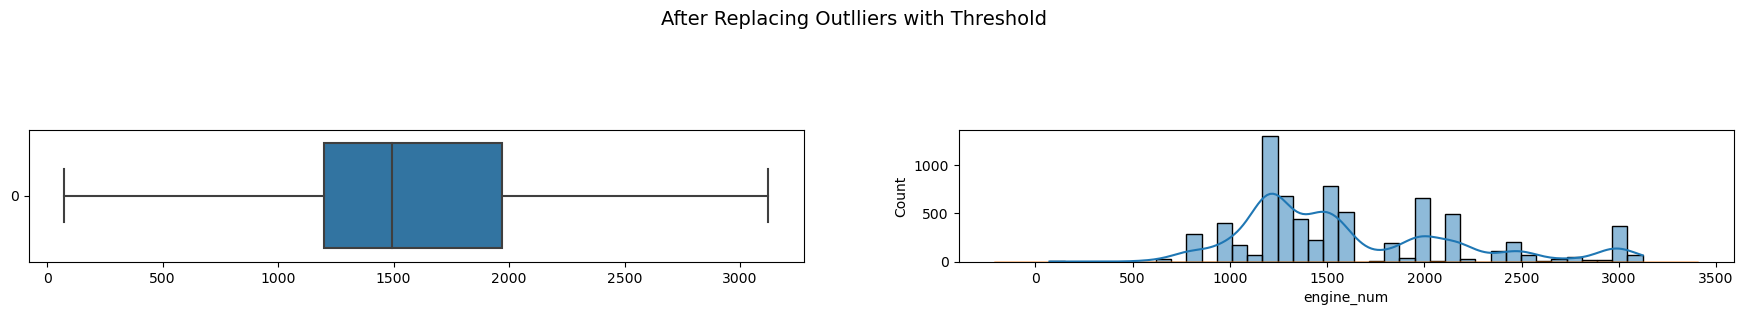

engine_num --> Min:  72.0  Max:  3123.0 Mean:  1608.01 Median:  1493.0 Std Dev:  564.6
engine_num --> low limit(Q1):  43.0  high limit(Q3):  3123.0  IQR :  3080.0
engine_num --> Skewness:  0.99


<Figure size 640x480 with 0 Axes>

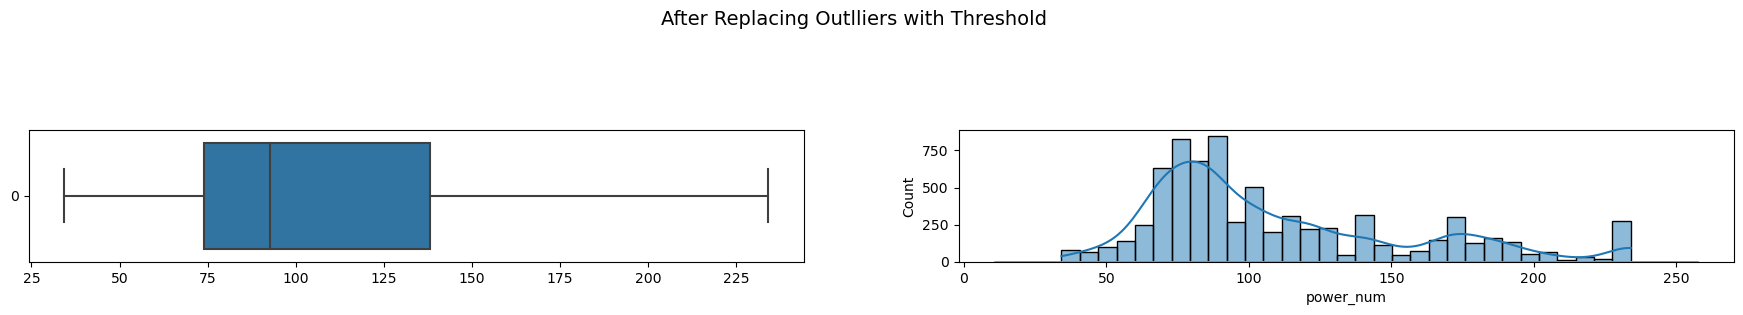

power_num --> Min:  34.2  Max:  234.08 Mean:  110.39 Median:  92.7 Std Dev:  46.83
power_num --> low limit(Q1):  -22.04  high limit(Q3):  234.08  IQR :  256.12
power_num --> Skewness:  1.02


<Figure size 640x480 with 0 Axes>

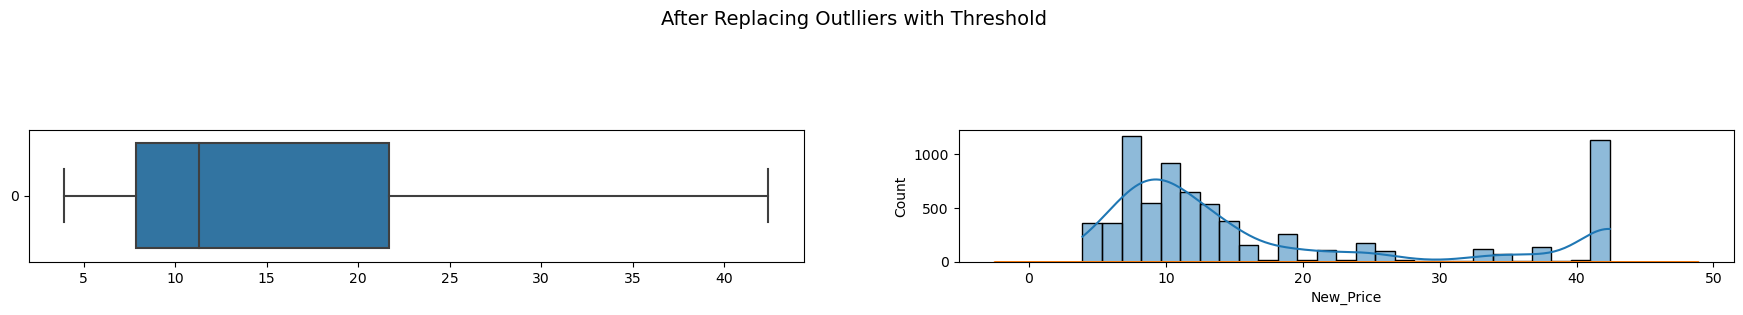

New_Price --> Min:  3.91  Max:  42.42 Mean:  17.28 Median:  11.3 Std Dev:  12.77
New_Price --> low limit(Q1):  -12.85  high limit(Q3):  42.42  IQR :  55.27
New_Price --> Skewness:  1.14


<Figure size 640x480 with 0 Axes>

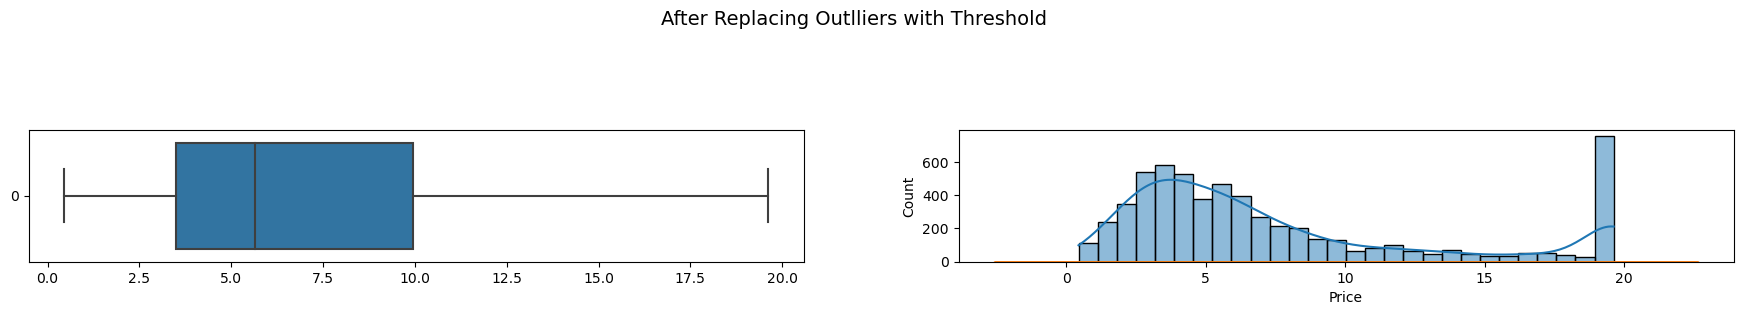

Price --> Min:  0.44  Max:  19.62 Mean:  7.71 Median:  5.64 Std Dev:  5.77
Price --> low limit(Q1):  -6.17  high limit(Q3):  19.62  IQR :  25.8
Price --> Skewness:  1.06


<Figure size 640x480 with 0 Axes>

In [35]:
# Replace Outliers using Thresholds into the copy of X_train dataframe and plot the distribution

index = 0
j = 0
used_cars_df_copy = used_cars_df.copy()

for col in num_features:
    index += 1
    j += 1
    
    low, high = outlier_thresholds(used_cars_df_copy, col)
    used_cars_df_copy.loc[(used_cars_df_copy[col] < low), col] = low
    used_cars_df_copy.loc[(used_cars_df_copy[col] > high), col] = high
    
    fig = plt.figure(figsize = (22,12))
    
    plt.suptitle('After Replacing Outlliers with Threshold', fontsize = 14, fontweight = 16)
    ax = plt.subplot(len(num_features),2, j)
    sns.boxplot(used_cars_df_copy[col], orient='h', ax = ax)
    
    ax1 = plt.subplot(len(num_features),2, j+1)
    sns.histplot(used_cars_df_copy[col], fill = True, kde = True, legend = True, ax = ax1)
    sns.kdeplot(used_cars_df_copy[col], fill = True, legend = True, ax = ax1)
    plt.show()
    
    print(col, '--> Min: ',np.round(used_cars_df_copy[col].min(),2),' Max: ', np.round(used_cars_df_copy[col].max(),2), 
          'Mean: ', np.round(used_cars_df_copy[col].mean(),2), 'Median: ', np.round(used_cars_df_copy[col].median(),2), 
          'Std Dev: ', np.round(used_cars_df_copy[col].std(),2))
    print(col, '--> low limit(Q1): ',np.round(low,2),' high limit(Q3): ',np.round(high,2),
         ' IQR : ', np.round((high - low),2))
    print(col, '--> Skewness: ',np.round(used_cars_df_copy[col].skew(),2))
    j = 0

    plt.tight_layout()

Understanding Skewness and the Need for Transformation
Skewness is a statistical measure that describes the asymmetry of a data distribution around its mean. In simpler terms, it indicates whether the bulk of the data is bunched up on one side of the scale, leaving a long tail stretching out in the opposite direction. There are two types of skewness you encounter in data analysis:

**Positive Skewness:** This occurs when the tail of the distribution extends towards higher values, on the right side of the peak. The majority of data points are clustered at the lower end of the scale, indicating that while most values are relatively low, there are a few exceptionally high values. The ‘SalePrice’ attribute in the Ames dataset exemplifies positive skewness, as most homes sell at lower prices, but a small number sell at significantly higher prices.

**Negative Skewness:** Conversely, negative skewness happens when the tail of the distribution stretches towards lower values, on the left side of the peak. In this scenario, the data is concentrated towards the higher end of the scale, with fewer values trailing off into lower numbers. The ‘YearBuilt’ feature of the Ames dataset is a perfect illustration of negative skewness, suggesting that while a majority of houses were built in more recent years, a smaller portion dates back to earlier times.

**Strategies for Taming `Positive Skewness`**

To combat positive skew, you can use five key transformations: Log, Square Root, Box-Cox, Yeo-Johnson, and Quantile Transformations. Each method aims to mitigate skewness, enhancing the data’s suitability for further analysis.

- **`Log Transformation`**
This method is particularly suited for right-skewed data, effectively minimizing large-scale differences by taking the natural log of all data points. This compression of the data range makes it more amenable for further statistical analysis.

- **`Square Root Transformation`**
A softer approach than the log transformation, ideal for moderately skewed data. By applying the square root to each data point, it reduces skewness and diminishes the impact of outliers, making the distribution more symmetric.

- **`Box-Cox Transformation`**
Offers flexibility by optimizing the transformation parameter lambda (λ), applicable only to positive data. The Box-Cox method systematically finds the best power transformation to reduce skewness and stabilize variance, enhancing the data’s normality.

- **`Yeo-Johnson Transformation`**
The above transformations only work with positive data. Yeo-Johnson is similar to Box-Cox but adaptable to both positive and non-positive data. It modifies the data through an optimal transformation parameter. This adaptability allows it to manage skewness across a wider range of data values, improving its fit for statistical models.

- **`Quantile Transformation`**
Quantile transformation maps data to a specified distribution, such as normal, effectively addresses skewness by distributing the data points evenly across the chosen distribution. This transformation normalizes the shape of the data, focusing on making the distribution more uniform or Gaussian-like without assuming it will directly benefit linear models due to its non-linear nature and the challenge of reverting the data to its original form.

**Strategies for Taming `Negative Skewness`**

To combat negative skew, you can use the five key transformations: Squared, Cubed, Box-Cox, Yeo-Johnson, and Quantile Transformations. Each method aims to mitigate skewness, enhancing the data’s suitability for further analysis.

- **`Squared Transformation`**
This involves taking each data point in the dataset and squaring it (i.e., raising it to the power of 2). The squared transformation is useful for reducing negative skewness because it tends to spread out the lower values more than the higher values. However, it’s more effective when all data points are positive and the degree of negative skewness is not extreme.

- **`Cubed Transformation`**
Similar to the squared transformation but involves raising each data point to the power of 3. The cubed transformation can further reduce negative skewness, especially in cases where the squared transformation is insufficient. It’s more aggressive in spreading out values, which can benefit more negatively skewed distribution

- **`Box-Cox Transformation`**
A more sophisticated method that finds the best lambda (λ) parameter to transform the data into a normal shape. The transformation is defined for positive data only. The Box-Cox transformation is highly effective for a wide range of distributions, including those with negative skewness, by making the data more symmetric. For negatively skewed data, a positive lambda is often found, applying a transformation that effectively reduces skewness.


**Skewness observed for `'used_cars_df' dataset:`**

- Kilometers_Driven --> Postive / Right Skewed
- mileage_num       --> Postive / Right Skewed
- engine_num        --> Postive / Right Skewed
- power_num         --> Postive / Right Skewed
- New Price         --> Postive / Right Skewed

In [36]:
# Create Log column for each NaN numerical colums includes logarithms transformation.

used_cars_df['Kilometers_Driven_Log'] = np.log(used_cars_df['Kilometers_Driven'])
used_cars_df['mileage_num_log']       = np.log(used_cars_df['mileage_num'])
used_cars_df['engine_num_log']        = np.log(used_cars_df['engine_num'])
used_cars_df['power_num_log']         = np.log(used_cars_df['power_num'])
used_cars_df['New_Price_log']         = np.log(used_cars_df['New_Price'])

log_features = ['Kilometers_Driven_Log', 'mileage_num_log', 'engine_num_log', 'power_num_log', 'New_Price_log']
log_features

['Kilometers_Driven_Log',
 'mileage_num_log',
 'engine_num_log',
 'power_num_log',
 'New_Price_log']

In [37]:
# Create 'Box Cox' column for each NaN numerical colums includes both logarithms and power transformations.

if (used_cars_df['Kilometers_Driven'] > 0).all():
    used_cars_df['Kilometers_Driven_boxcox'], _ = pd.Series(boxcox(used_cars_df['Kilometers_Driven']))
else:
    # Consider alternative transformations or handling strategies
    print("Not all Kilometers_Driven values are positive. Consider using Yeo-Johnson or handling negative values.")

if (used_cars_df['mileage_num'] > 0).all():
    used_cars_df['mileage_num_boxcox'], _ = pd.Series(boxcox(used_cars_df['mileage_num']))
else:
    # Consider alternative transformations or handling strategies
    print("Not all mileage_num values are positive. Consider using Yeo-Johnson or handling negative values.")

if (used_cars_df['engine_num'] > 0).all():
    used_cars_df['engine_num_boxcox'], _ = pd.Series(boxcox(used_cars_df['engine_num']))
else:
    # Consider alternative transformations or handling strategies
    print("Not all engine_num values are positive. Consider using Yeo-Johnson or handling negative values.")

if (used_cars_df['power_num'] > 0).all():
    used_cars_df['power_num_boxcox'], _ = pd.Series(boxcox(used_cars_df['power_num']))
else:
    # Consider alternative transformations or handling strategies
    print("Not all power_num values are p, _ositive. Consider using Yeo-Johnson or handling negative values.")

if (used_cars_df['New_Price'] > 0).all():
    used_cars_df['New_Price_boxcox'], _ = pd.Series(boxcox(used_cars_df['New_Price']))
else:
    # Consider alternative transformations or handling strategies
    print("Not all New_Price values are positive. Consider using Yeo-Johnson or handling negative values.")

boxcox_features = ['Kilometers_Driven_boxcox', 'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox', 
                   'New_Price_boxcox']
boxcox_features

['Kilometers_Driven_boxcox',
 'mileage_num_boxcox',
 'engine_num_boxcox',
 'power_num_boxcox',
 'New_Price_boxcox']

Kilometers_Driven_Log


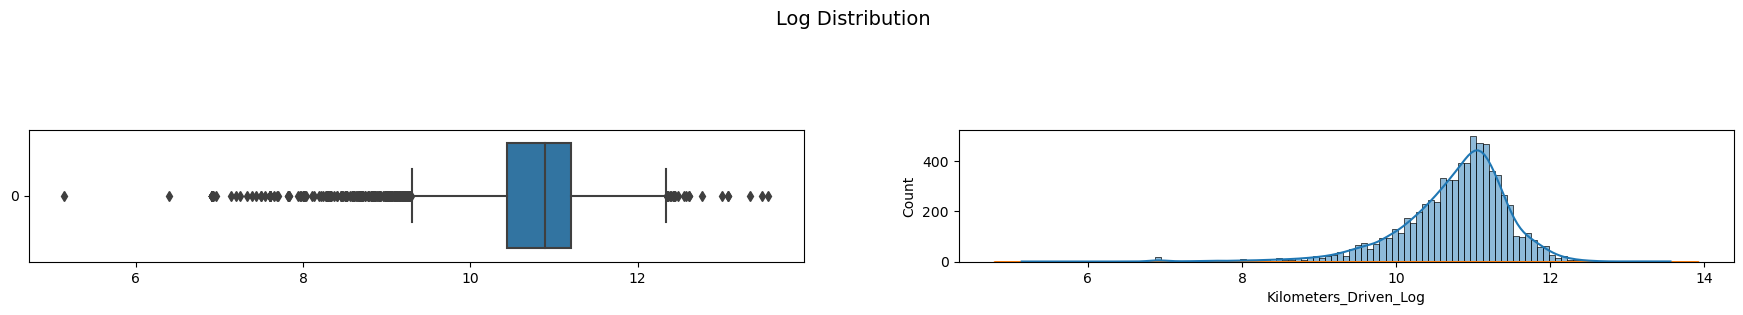

Kilometers_Driven_Log --> Min:  5.14  Max:  13.56 Mean:  10.76 Median:  10.89 Std Dev:  0.71
Kilometers_Driven_Log --> low limit(Q1):  9.29  high limit(Q3):  12.34  IQR :  3.06
Kilometers_Driven_Log --> Skewness:  -1.35
Kilometers_Driven_Log --> has outliers
mileage_num_log


<Figure size 640x480 with 0 Axes>

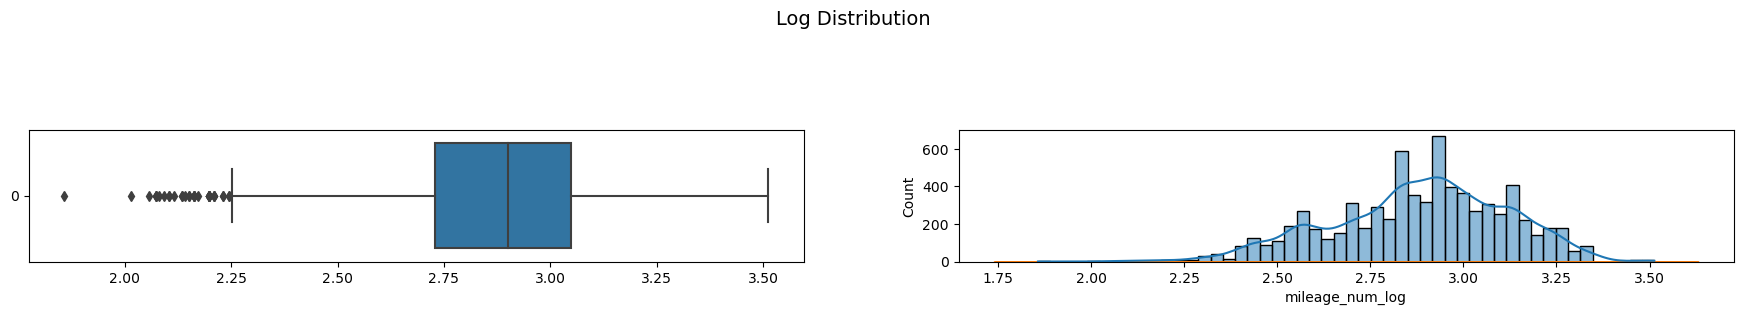

mileage_num_log --> Min:  1.86  Max:  3.51 Mean:  2.88 Median:  2.9 Std Dev:  0.23
mileage_num_log --> low limit(Q1):  2.25  high limit(Q3):  3.53  IQR :  1.29
mileage_num_log --> Skewness:  -0.36
mileage_num_log --> has outliers
engine_num_log


<Figure size 640x480 with 0 Axes>

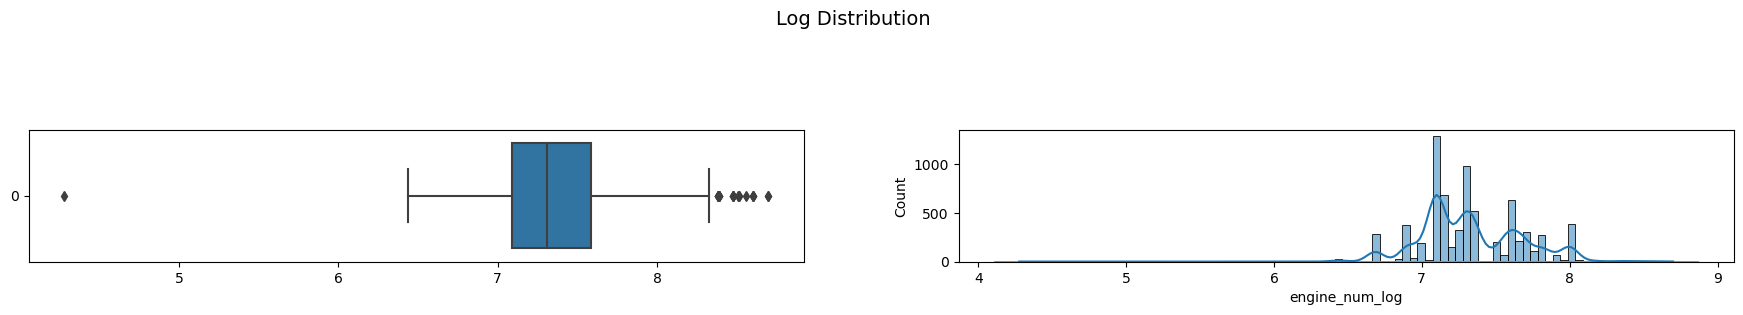

engine_num_log --> Min:  4.28  Max:  8.7 Mean:  7.33 Median:  7.31 Std Dev:  0.34
engine_num_log --> low limit(Q1):  6.34  high limit(Q3):  8.33  IQR :  1.99
engine_num_log --> Skewness:  0.3
engine_num_log --> has outliers
power_num_log


<Figure size 640x480 with 0 Axes>

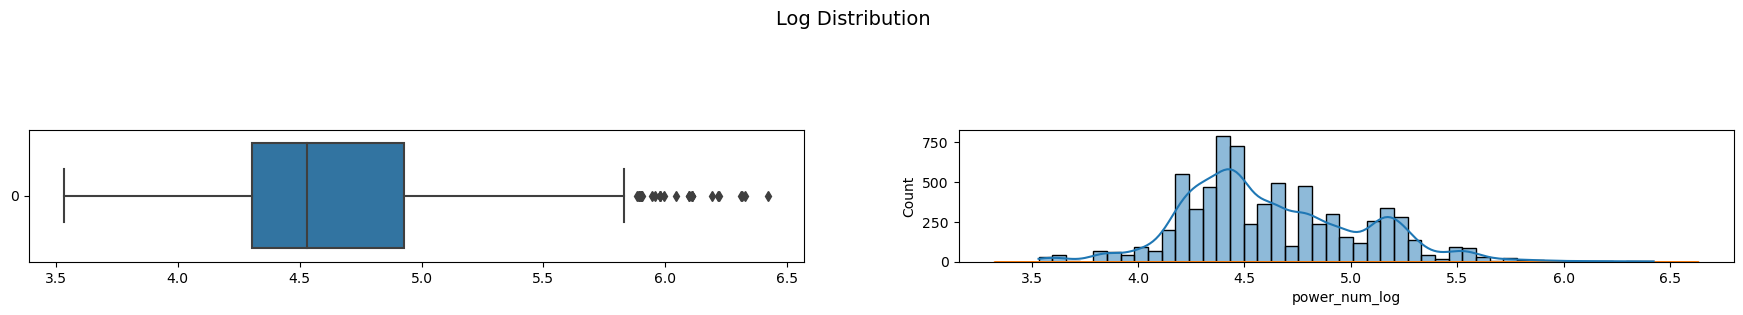

power_num_log --> Min:  3.53  Max:  6.42 Mean:  4.63 Median:  4.53 Std Dev:  0.41
power_num_log --> low limit(Q1):  3.37  high limit(Q3):  5.86  IQR :  2.49
power_num_log --> Skewness:  0.46
power_num_log --> has outliers
New_Price_log


<Figure size 640x480 with 0 Axes>

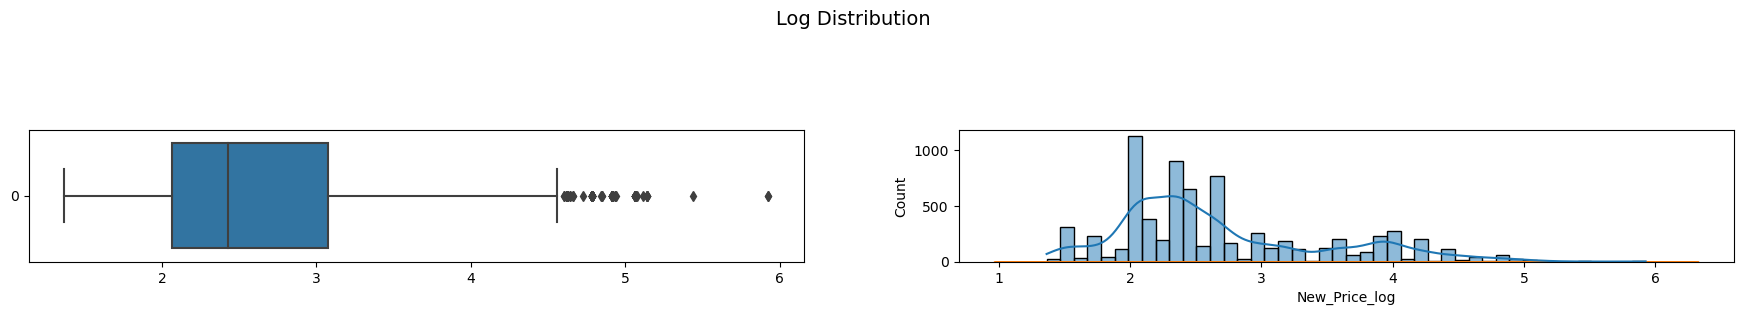

New_Price_log --> Min:  1.36  Max:  5.93 Mean:  2.68 Median:  2.42 Std Dev:  0.79
New_Price_log --> low limit(Q1):  0.55  high limit(Q3):  4.6  IQR :  4.05
New_Price_log --> Skewness:  0.92
New_Price_log --> has outliers


<Figure size 640x480 with 0 Axes>

In [38]:
# Now check out distribution of Log numerical features

index = 0
j = 0
for col in log_features:
    
    index += 1
    j += 1
    
    print(col)
    
    fig = plt.figure(figsize = (22,12))
    
    plt.suptitle('Log Distribution', fontsize = 14)
    ax = plt.subplot(len(num_features),2, j)
    sns.boxplot(used_cars_df[col], orient='h', ax = ax)
    
    ax1 = plt.subplot(len(num_features),2, j+1)
    sns.histplot(used_cars_df[col], fill = True, kde = True, legend = True, ax = ax1)
    sns.kdeplot(used_cars_df[col], fill = True, legend = True, ax = ax1)
    
    plt.show()
    
    print(col, '--> Min: ',np.round(used_cars_df[col].min(),2),' Max: ', np.round(used_cars_df[col].max(),2), 'Mean: ', 
          np.round(used_cars_df[col].mean(),2), 'Median: ', np.round(used_cars_df[col].median(),2), 
          'Std Dev: ', np.round(used_cars_df[col].std(),2))
    
    low, high = outlier_thresholds(used_cars_df, col)
    print(col, '--> low limit(Q1): ',np.round(low,2),' high limit(Q3): ',np.round(high,2),
         ' IQR : ', np.round((high - low),2))
    print(col, '--> Skewness: ',np.round(used_cars_df[col].skew(),2))
    is_outlier = fn_find_outlier(used_cars_df, col, low, high)
    if is_outlier.any() == True:
         print(col,"--> has outliers")
    else:
         print(col, '--> has no outliers')
    
    j = 0

    plt.tight_layout()

In [39]:
used_cars_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage_num,engine_num,power_num,...,Kilometers_Driven_Log,mileage_num_log,engine_num_log,power_num_log,New_Price_log,Kilometers_Driven_boxcox,mileage_num_boxcox,engine_num_boxcox,power_num_boxcox,New_Price_boxcox
0,Mumbai,2010,72000.0,CNG,Manual,First,5.0,26.60,998.0,58.16,...,11.184421,3.280911,6.905753,4.063198,1.706565,184.331641,10.043739,3.715086,2.046715,1.116445
1,Pune,2015,41000.0,Diesel,Manual,First,5.0,19.67,1582.0,126.20,...,10.621327,2.979095,7.366445,4.837868,2.776332,148.187640,8.129616,3.823453,2.185427,1.441053
2,Chennai,2011,46000.0,Petrol,Manual,First,5.0,18.20,1199.0,88.70,...,10.736397,2.901422,7.089243,4.485260,2.152924,154.956190,7.689705,3.759465,2.127418,1.274815
3,Chennai,2012,87000.0,Diesel,Manual,First,7.0,20.77,1248.0,88.76,...,11.373663,3.033510,7.129298,4.485936,2.422144,198.329569,8.450028,3.768935,2.127537,1.353484
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,...,10.613246,2.721295,7.584773,4.947340,3.972930,147.723357,6.743853,3.871378,2.201884,1.639044


Kilometers_Driven_boxcox


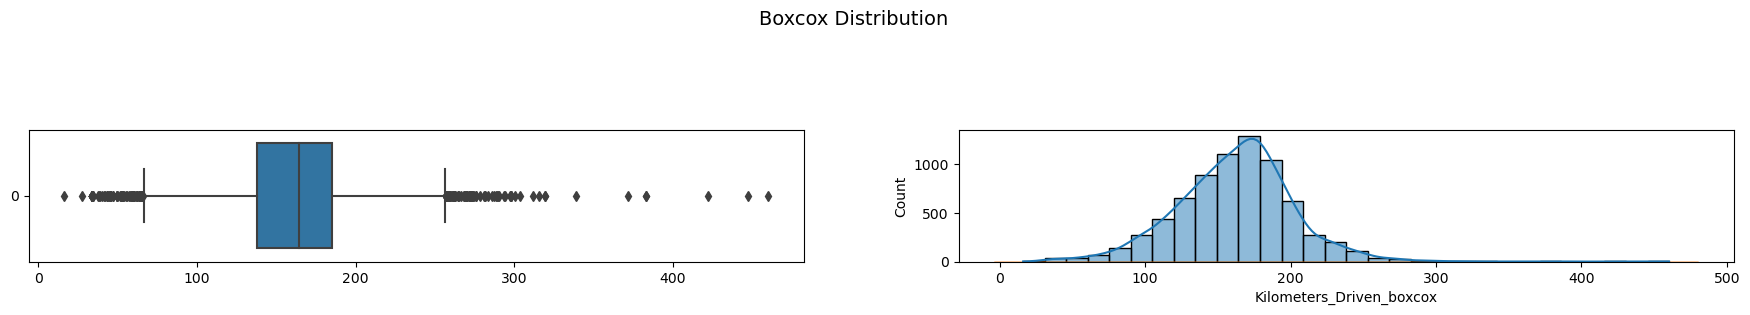

Kilometers_Driven_boxcox --> Min:  16.02  Max:  460.26 Mean:  161.8 Median:  164.22 Std Dev:  39.77
Kilometers_Driven_boxcox --> low limit(Q1):  66.5  high limit(Q3):  256.61  IQR :  190.11
Kilometers_Driven_boxcox --> Skewness:  0.11
Kilometers_Driven_boxcox --> has outliers
mileage_num_boxcox


<Figure size 640x480 with 0 Axes>

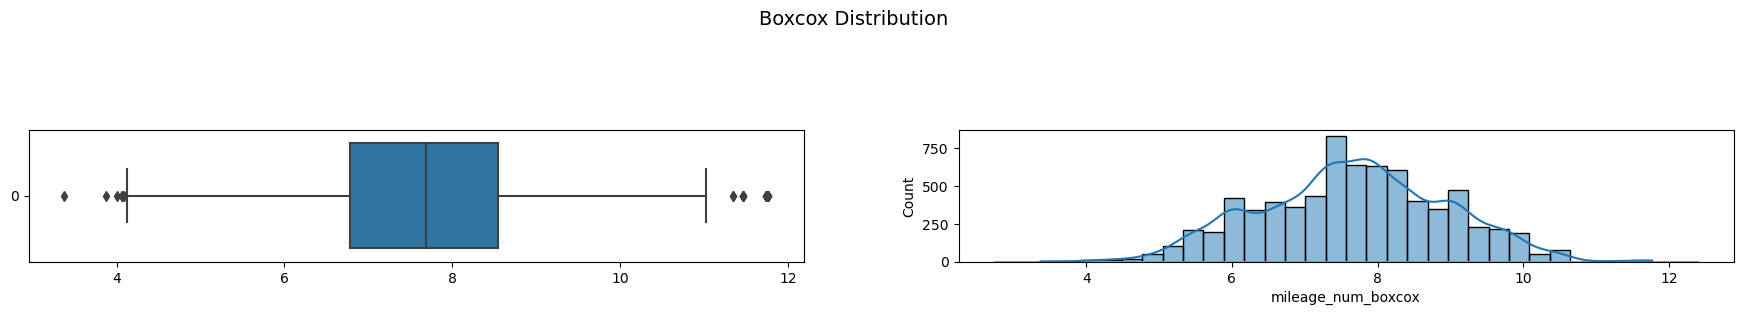

mileage_num_boxcox --> Min:  3.37  Max:  11.76 Mean:  7.67 Median:  7.69 Std Dev:  1.26
mileage_num_boxcox --> low limit(Q1):  4.12  high limit(Q3):  11.2  IQR :  7.07
mileage_num_boxcox --> Skewness:  -0.02
mileage_num_boxcox --> has outliers
engine_num_boxcox


<Figure size 640x480 with 0 Axes>

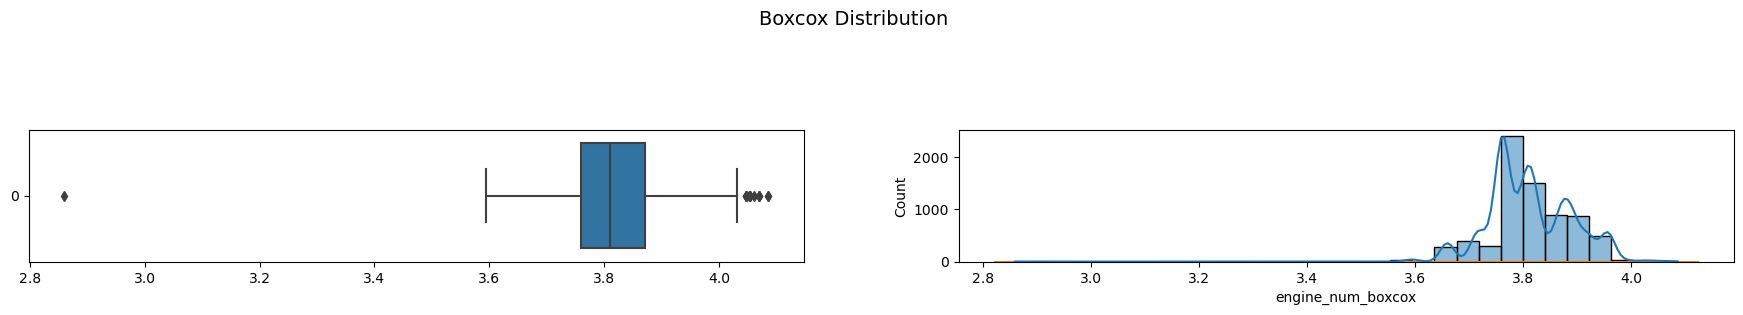

engine_num_boxcox --> Min:  2.86  Max:  4.09 Mean:  3.81 Median:  3.81 Std Dev:  0.08
engine_num_boxcox --> low limit(Q1):  3.59  high limit(Q3):  4.04  IQR :  0.45
engine_num_boxcox --> Skewness:  -0.05
engine_num_boxcox --> has outliers
power_num_boxcox


<Figure size 640x480 with 0 Axes>

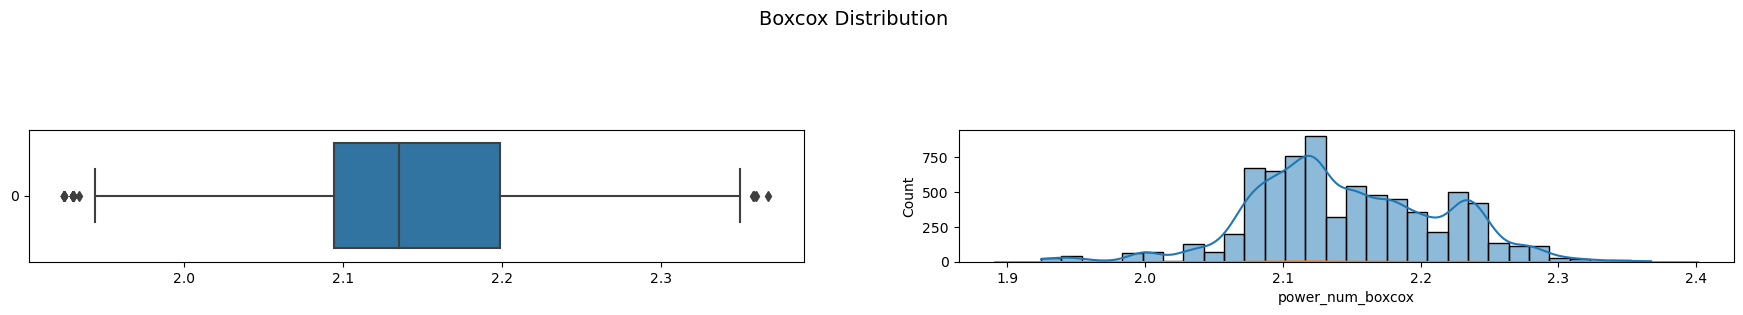

power_num_boxcox --> Min:  1.92  Max:  2.37 Mean:  2.15 Median:  2.14 Std Dev:  0.07
power_num_boxcox --> low limit(Q1):  1.94  high limit(Q3):  2.36  IQR :  0.42
power_num_boxcox --> Skewness:  0.0
power_num_boxcox --> has outliers
New_Price_boxcox


<Figure size 640x480 with 0 Axes>

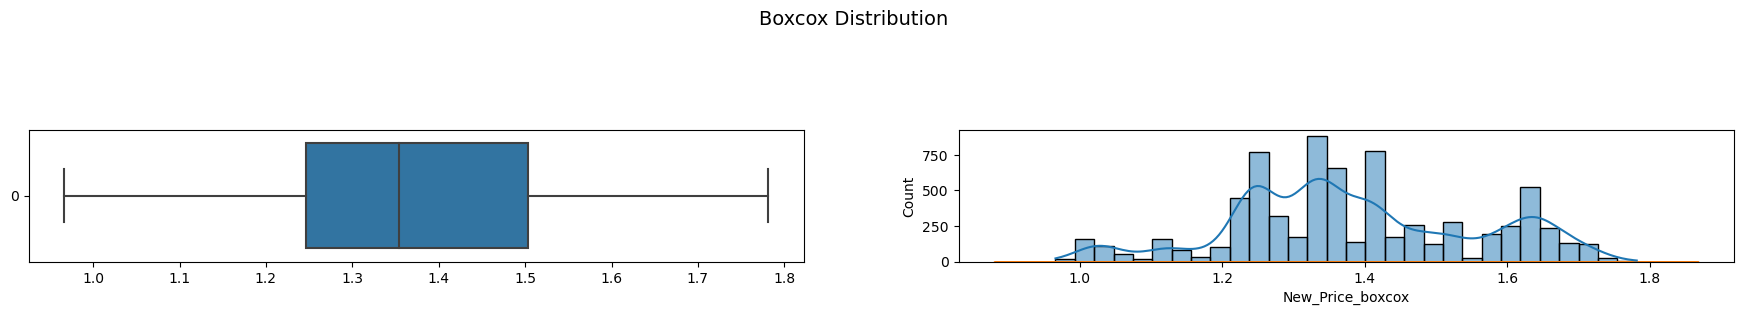

New_Price_boxcox --> Min:  0.97  Max:  1.78 Mean:  1.38 Median:  1.35 Std Dev:  0.17
New_Price_boxcox --> low limit(Q1):  0.86  high limit(Q3):  1.89  IQR :  1.03
New_Price_boxcox --> Skewness:  0.11
New_Price_boxcox --> has outliers


<Figure size 640x480 with 0 Axes>

In [40]:
# Now check out the distribution of 'Box cox' numerical features

index = 0
j = 0
for col in boxcox_features:
    
    index += 1
    j += 1
    
    print(col)
    
    fig = plt.figure(figsize = (22,12))
    
    plt.suptitle('Boxcox Distribution', fontsize = 14)
    ax = plt.subplot(len(num_features),2, j)
    sns.boxplot(used_cars_df[col], orient='h', ax = ax)
    
    ax1 = plt.subplot(len(num_features),2, j+1)
    sns.histplot(used_cars_df[col],  kde = True,  bins = 30, ax = ax1)
    sns.kdeplot(used_cars_df[col], fill = True, legend = True, ax = ax1)
    
    plt.show()
    
    print(col, '--> Min: ',np.round(used_cars_df[col].min(),2),' Max: ', np.round(used_cars_df[col].max(),2), 'Mean: ', 
          np.round(used_cars_df[col].mean(),2), 'Median: ', np.round(used_cars_df[col].median(),2), 
          'Std Dev: ', np.round(used_cars_df[col].std(),2))
    
    low, high = outlier_thresholds(used_cars_df, col)
    print(col, '--> low limit(Q1): ',np.round(low,2),' high limit(Q3): ',np.round(high,2),
         ' IQR : ', np.round((high - low),2))
    print(col, '--> Skewness: ',np.round(used_cars_df[col].skew(),2))
    is_outlier = fn_find_outlier(used_cars_df, col, low, high)
    if is_outlier.any() == True:
         print(col,"--> has outliers")
    else:
         print(col, '--> has no outliers')
    
    j = 0

    plt.tight_layout()

**Compare Skewness amongst Numerical, Log, Boxcox and threshold replaced features**

In [41]:
for col in num_features:
    print('Skewness of', col, ':', np.round(used_cars_df[col].skew(),2))

Skewness of Kilometers_Driven : 3.83
Skewness of mileage_num : 0.22
Skewness of engine_num : 1.41
Skewness of power_num : 1.97
Skewness of New_Price : 3.29
Skewness of Price : 3.34


In [42]:
for col in log_features:
    print('Skewness of', col, ':', np.round(used_cars_df[col].skew(),2))

Skewness of Kilometers_Driven_Log : -1.35
Skewness of mileage_num_log : -0.36
Skewness of engine_num_log : 0.3
Skewness of power_num_log : 0.46
Skewness of New_Price_log : 0.92


In [43]:
for col in boxcox_features:
    print('Skewness of', col, ':', np.round(used_cars_df[col].skew(),2))

Skewness of Kilometers_Driven_boxcox : 0.11
Skewness of mileage_num_boxcox : -0.02
Skewness of engine_num_boxcox : -0.05
Skewness of power_num_boxcox : 0.0
Skewness of New_Price_boxcox : 0.11


In [44]:
for col in num_features:
    print('Skewness of', col, ':', np.round(used_cars_df_copy[col].skew(),2))

Skewness of Kilometers_Driven : 0.62
Skewness of mileage_num : 0.17
Skewness of engine_num : 0.99
Skewness of power_num : 1.02
Skewness of New_Price : 1.14
Skewness of Price : 1.06


#### Inference: The skewness for Box Cox columns have minimum factor compared with other imputing factors

### 4.4 Encoding (Label Encoding, One-Hot Encoding, Target Encoding)<a id='4.4'></a>

**What is Categorical Data?**

Categorical data, also known as nominal or ordinal data, is a type of data that consists of values that fall into distinct categories or groups. Unlike numerical data, which represents measurable quantities, categorical data represents qualitative or descriptive characteristics. It is crucial to understand categorical data when working with machine learning models, as most models require numerical inputs.

**Types of Categorical Data**
There are two main types of categorical data:

**`1. Ordinal Data`**
Ordinal data refers to categories that have an inherent order or ranking. When encoding ordinal data, it’s essential to retain the information about the order in which the categories are provided. For example, when considering the highest degree a person possesses, the degree level provides vital information about their qualification, which can be an important feature in determining their suitability for a job.

**`2. Nominal Data`**
Nominal data refers to categories that do not have an inherent order or ranking. When encoding nominal data, the presence or absence of a feature is considered, but the order is not relevant. For instance, when considering the city where a person lives, it’s important to retain the information about which city they live in, but there is no particular order or sequence among the cities (e.g., living in Delhi or Bangalore is equal).

By understanding the nature of categorical data and the distinction between ordinal and nominal data, data scientists and machine learning practitioners can make informed decisions about the appropriate encoding techniques to use, ensuring that the valuable information contained within categorical variables is effectively captured and utilized by their models.

There are different encoding methods, each with its pros and cons:

**`One-Hot Encoding:`** 
Great for many categories, creates new binary features (1 for the category, 0 for others).

**`Dummy Encoding`**
Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

**`Label Encoding:`** 
Simple, assigns a number to each category, but assumes order matters (which might not be true).
Ordinal Encoding: Similar to label encoding, but only use it if categories have a natural order (like low, medium, high).

**`Binary Encoding`**
Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns. Binary encoding machine learning works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.

**Types of Encoding in Machine Learning**
<br>`1. Identify Categorical Features:`
First, look at your data and find the features that contain non-numerical values like text labels or categories (e.g., color, size, customer type). These are the features that need encoding.
<br>`2. Choose an Encoding Technique:`
There are different encoding methods, each with its pros and cons. Here’s a quick guide to some popular choices:
One-Hot Encoding: Great for many categories, creates new binary features (1 for the category, 0 for others).
Label Encoding: Simple, assigns a number to each category, but assumes order matters (which might not be true).
Ordinal Encoding: Similar to label encoding, but only use it if categories have a natural order (like low, medium, high).
<br>`3. Apply the Encoding:`
Once you’ve chosen your technique, it’s time to apply it to your data. Many machine learning libraries have built-in functions for encoding.
For example, with one-hot encoding, you might create a new binary feature for each category in your original feature.
4. Test and Refine (Optional):

In some cases, you might want to try different encoding techniques and see how they affect your machine learning model’s performance. This can help you find the best approach for your specific data.

In [45]:
used_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Location                  7252 non-null   category
 1   Year                      7252 non-null   category
 2   Kilometers_Driven         7252 non-null   float64 
 3   Fuel_Type                 7252 non-null   category
 4   Transmission              7252 non-null   category
 5   Owner_Type                7252 non-null   category
 6   Seats                     7252 non-null   category
 7   mileage_num               7252 non-null   float64 
 8   engine_num                7252 non-null   float64 
 9   power_num                 7252 non-null   float64 
 10  Brand                     7252 non-null   category
 11  Model                     7252 non-null   category
 12  New_Price                 7252 non-null   float64 
 13  Price                     6019 non-null   float6

In [46]:
used_cars_df.to_csv('used_cars_df.csv', index=False)

In [60]:
# Create Dependent and Independent Features

X = used_cars_df.drop(['mileage_num', 'engine_num', 'power_num', 'Kilometers_Driven', 'New_Price', 'Price', 
                       'Seats_NA', 'mileage_num_NA', 'engine_num_NA', 'power_num_NA', 'Kilometers_Driven_NA', 
                       'mileage_num_log', 'engine_num_log', 'power_num_log', 'Kilometers_Driven_Log', 'New_Price_log', 
                       'New_Price_boxcox', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1)

y = used_cars_df['New_Price_boxcox']

X.shape, y.shape

((7252, 13), (7252,))

In [61]:
# Splitting dataset into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5801, 13), (5801,), (1451, 13), (1451,))

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5801 entries, 5811 to 5640
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Location                  5801 non-null   category
 1   Year                      5801 non-null   category
 2   Fuel_Type                 5801 non-null   category
 3   Transmission              5801 non-null   category
 4   Owner_Type                5801 non-null   category
 5   Seats                     5801 non-null   category
 6   Brand                     5801 non-null   category
 7   Model                     5801 non-null   category
 8   NP_Category               5801 non-null   category
 9   Kilometers_Driven_boxcox  5801 non-null   float64 
 10  mileage_num_boxcox        5801 non-null   float64 
 11  engine_num_boxcox         5801 non-null   float64 
 12  power_num_boxcox          5801 non-null   float64 
dtypes: category(9), float64(4)
memory usage: 296.7 KB


In [63]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 5801 entries, 5811 to 5640
Series name: New_Price_boxcox
Non-Null Count  Dtype  
--------------  -----  
5801 non-null   float64
dtypes: float64(1)
memory usage: 90.6 KB


In [64]:
# Numerical groups

num_features        = ['Kilometers_Driven_boxcox', 'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox']
dist_features       = ['Kilometers_Driven_boxcox', 'mileage_num_boxcox']
engine_features     = ['engine_num_boxcox', 'power_num_boxcox']

# Categorical Groups

cat_features        = ['Year', 'Location', 'Seats', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model', 
                       'NP_Category']
fuel_trans_type     = ['Fuel_Type', 'Transmission']
owner_seat_types    = ['Locaton', 'Owner_Type', 'Seats']
brand_model_types   = ['Year', 'Brand', 'Model', 'NP_Category']

In [65]:
for col in cat_features:
    print('unique values for ', col, ':', X[col].nunique())

unique values for  Year : 23
unique values for  Location : 11
unique values for  Seats : 8
unique values for  Fuel_Type : 5
unique values for  Transmission : 2
unique values for  Owner_Type : 4
unique values for  Brand : 32
unique values for  Model : 218
unique values for  NP_Category : 10


**Decide Type of Encoding to categorical features based on number of unique values per above**
-  'Fuel_Type', 'Transmission', 'Owner_Type', 'NP_Category' --> **Onehot Encoding**
- 'Seats', 'Owner_Type', 'NP_Category'                      --> **Ordinal Encoding**
- 'Location', 'Year', 'Brand', 'Model'                      --> **Target  Encoding**

In [66]:
# Define the columns for each type of encoding

numscal_cols = num_features
onehot_cols  = ['Fuel_Type', 'Transmission', 'Owner_Type']
ordinal_cols = ['Seats', 'Owner_Type', 'NP_Category']
target_cols  = ['Location', 'Year', 'Brand', 'Model']

cols         = numscal_cols + onehot_cols + ordinal_cols + target_cols
print(cols)

['Kilometers_Driven_boxcox', 'mileage_num_boxcox', 'engine_num_boxcox', 'power_num_boxcox', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Owner_Type', 'NP_Category', 'Location', 'Year', 'Brand', 'Model']


In [67]:
# List the names of the X_train categorical columns to utilize it to rename after transforming the dataframe

numscal_cols_transformed     = []
onehot_cols_transformed      = []
ordinal_cols_transformed     = []
target_cols_cols_transformed = []

for i, col in enumerate(numscal_cols):
    numscal_cols_transformed.append(col+'_'+str(i))

for i, col in enumerate(onehot_cols):
    j = 0
    for j in range(X_train[col].nunique()):
        onehot_cols_transformed.append(col+'trans_'+str(j))
        #print(col)

for i, col in enumerate(ordinal_cols):
    ordinal_cols_transformed.append(col+'_'+str(i))

for i, col in enumerate(target_cols):
    target_cols_cols_transformed.append(col+'_'+str(i))

transformed_cols = numscal_cols_transformed + onehot_cols_transformed + ordinal_cols_transformed + \
    target_cols_cols_transformed
print(transformed_cols)
print(len(transformed_cols))

['Kilometers_Driven_boxcox_0', 'mileage_num_boxcox_1', 'engine_num_boxcox_2', 'power_num_boxcox_3', 'Fuel_Typetrans_0', 'Fuel_Typetrans_1', 'Fuel_Typetrans_2', 'Fuel_Typetrans_3', 'Fuel_Typetrans_4', 'Transmissiontrans_0', 'Transmissiontrans_1', 'Owner_Typetrans_0', 'Owner_Typetrans_1', 'Owner_Typetrans_2', 'Owner_Typetrans_3', 'Seats_0', 'Owner_Type_1', 'NP_Category_2', 'Location_0', 'Year_1', 'Brand_2', 'Model_3']
22


In [68]:
# Create Column transformers for each categorical type for encoding

# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

# Initial transformers for the respective features

numscal_scaler  = StandardScaler()
onehot_encoder  = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()
target_encoder  = MEstimateEncoder(cols=['Location', 'Year', 'Brand', 'Model'], m=5.0)
model_regtree   = DecisionTreeRegressor(random_state=0)

# Create a ColumnTransformer to apply the encoders to the correct columns

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler',  numscal_scaler,  numscal_cols), 
        ('onehot',  onehot_encoder,  onehot_cols), 
        ('ordinal', ordinal_encoder, ordinal_cols), 
        ('target',  target_encoder,  target_cols)])

# Create a pipeline with the preprocessor

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ("model", model_regtree)])

X_train_transformed = pipeline.fit_transform(X_train, y_train)
X_test_transformed  = pipeline.transform(X_test)

# Convert the result back to a dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=transformed_cols)
X_test_transformed_df  = pd.DataFrame(X_test_transformed,  columns=transformed_cols)

In [69]:
X_train_transformed_df.shape, y_train.shape, X_test_transformed_df.shape, y_test.shape

((5801, 22), (5801,), (1451, 22), (1451,))

In [70]:
X_train_transformed_df.head()

,Kilometers_Driven_boxcox_0,mileage_num_boxcox_1,engine_num_boxcox_2,power_num_boxcox_3,Fuel_Typetrans_0,Fuel_Typetrans_1,Fuel_Typetrans_2,Fuel_Typetrans_3,Fuel_Typetrans_4,Transmissiontrans_0,...,Owner_Typetrans_1,Owner_Typetrans_2,Owner_Typetrans_3,Seats_0,Owner_Type_1,NP_Category_2,Location_0,Year_1,Brand_2,Model_3
0,-0.562009,-1.447684,0.527290,1.111896,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,4.0,1.359367,1.384069,1.508432,1.559743
1,-0.739027,0.595357,0.822946,1.434670,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,5.0,1.388889,1.373640,1.647874,1.590579
2,1.006952,-0.334569,-0.341047,-0.451610,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,3.0,7.0,1.359367,1.333636,1.318896,1.343152
3,0.897126,-1.763423,1.909078,1.226923,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,1.408250,1.401578,1.493710,1.581968
4,-0.639711,1.139142,-1.269595,-1.044346,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,0.0,9.0,1.388889,1.373640,1.212975,1.160184


In [71]:
X_test_transformed_df.head()

,Kilometers_Driven_boxcox_0,mileage_num_boxcox_1,engine_num_boxcox_2,power_num_boxcox_3,Fuel_Typetrans_0,Fuel_Typetrans_1,Fuel_Typetrans_2,Fuel_Typetrans_3,Fuel_Typetrans_4,Transmissiontrans_0,...,Owner_Typetrans_1,Owner_Typetrans_2,Owner_Typetrans_3,Seats_0,Owner_Type_1,NP_Category_2,Location_0,Year_1,Brand_2,Model_3
0,1.038057,-0.247300,0.822946,0.926524,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.380552,1.389775,1.338519,1.394482
1,1.366773,0.563121,0.184321,0.114005,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.380552,1.401578,1.347161,1.394840
2,-1.735000,0.872581,-0.218952,-0.274108,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,7.0,1.403286,1.389775,1.318896,1.328210
3,-0.578255,0.344294,-0.081910,0.224807,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,1.0,1.413652,1.368889,1.338519,1.422363
4,-0.746094,0.249874,-0.691533,-0.550326,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2.0,0.0,7.0,1.388889,1.384069,1.318896,1.328854


In [72]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Kilometers_Driven_boxcox_0  5801 non-null   float64
 1   mileage_num_boxcox_1        5801 non-null   float64
 2   engine_num_boxcox_2         5801 non-null   float64
 3   power_num_boxcox_3          5801 non-null   float64
 4   Fuel_Typetrans_0            5801 non-null   float64
 5   Fuel_Typetrans_1            5801 non-null   float64
 6   Fuel_Typetrans_2            5801 non-null   float64
 7   Fuel_Typetrans_3            5801 non-null   float64
 8   Fuel_Typetrans_4            5801 non-null   float64
 9   Transmissiontrans_0         5801 non-null   float64
 10  Transmissiontrans_1         5801 non-null   float64
 11  Owner_Typetrans_0           5801 non-null   float64
 12  Owner_Typetrans_1           5801 non-null   float64
 13  Owner_Typetrans_2           5801 

### 5 Model Building<a id='5'></a>

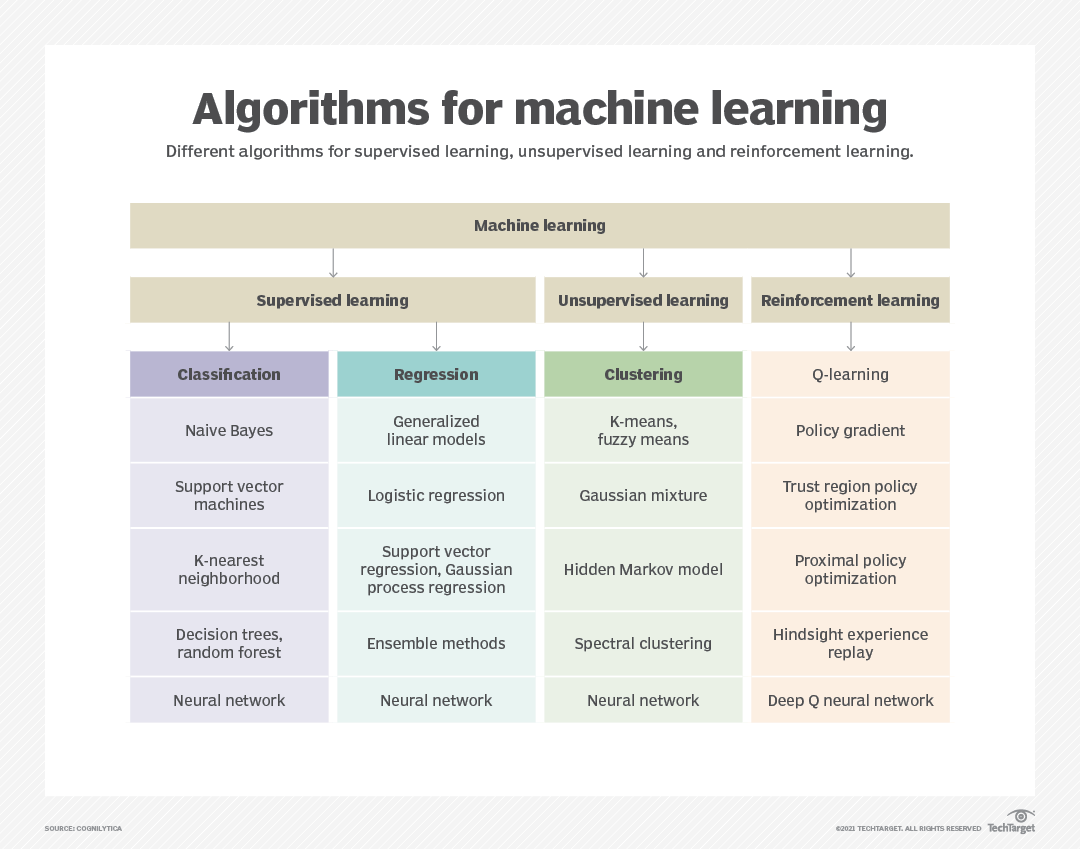

Ref: https://www.techtarget.com/searchenterpriseai/feature/How-to-build-a-machine-learning-model-in-7-steps